# 1. Import libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, Normalizer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

# 2. Load data

In [2]:
data = pd.read_csv('fifa21_male2.csv')
data

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [3]:
data = data.drop_duplicates()
data

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

# 3.1 Order players by Overall Rating (OVA).

In [4]:
data_OVA= data.sort_values(by=['OVA'], ascending=False)
data_OVA.head(10)

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
752,158023,L. Messi,33,93,Argentina,FC Barcelona,93,RW,RW ST CF,https://cdn.sofifa.com/players/158/023/20_120.png,https://cdn.sofifa.com/teams/241/light_60.png,https://cdn.sofifa.com/flags/ar.png,93,FC Barcelona 2004 ~ 2021,"5'7""",159lbs,Left,0,"Jul 1, 2004",NaN,€67.5M,€560K,€138.4M,2004 ~ 2021,429,85,95,70,91,88.0,470,96,93.0,94,91,96,451,91,80,91.0,94,95.0,389,86,68.0,72,69,94,347,44,40.0,93.0,95.0,75,96.0,91,32,35,24.0,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,830,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,19+3,Male
142,20801,Cristiano Ronaldo,35,92,Portugal,Juventus,92,ST,ST LW,https://cdn.sofifa.com/players/020/801/20_120.png,https://cdn.sofifa.com/teams/45/light_60.png,https://cdn.sofifa.com/flags/pt.png,92,Juventus 2018 ~ 2022,"6'2""",183lbs,Right,0,"Jul 10, 2018",NaN,€46M,€220K,€75.9M,2018 ~ 2022,437,84,95,90,82,86.0,414,88,81.0,76,77,92,431,87,91,87.0,95,71.0,444,94,95.0,84,78,93,353,63,29.0,95.0,82.0,84,95.0,84,28,32,24.0,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,750,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,20+3,Male
2871,192985,K. De Bruyne,29,91,Belgium,Manchester City,91,CAM,CAM CM,https://cdn.sofifa.com/players/192/985/20_120.png,https://cdn.sofifa.com/teams/10/light_60.png,https://cdn.sofifa.com/flags/be.png,91,Manchester City 2015 ~ 2023,"5'11""",154lbs,Right,0,"Aug 30, 2015",NaN,€87M,€370K,€161M,2015 ~ 2023,407,94,82,55,94,82.0,441,88,85.0,83,93,92,398,77,76,78.0,91,76.0,408,91,63.0,89,74,91,408,76,66.0,88.0,94.0,84,91.0,186,68,65,53.0,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,406,83+3,83+3,83+3,88+0,88+0,88+0,88+0,88+0,89+2,89+2,89+2,89+2,89+2,89+2,89+2,89+2,79+3,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3,Male
2287,188545,R. Lewandowski,31,91,Poland,FC Bayern München,91,ST,ST,https://cdn.sofifa.com/players/188/545/20_120.png,https://cdn.sofifa.com/teams/21/light_60.png,https://cdn.sofifa.com/flags/pl.png,91,FC Bayern München 2014 ~ 2023,"6'0""",176lbs,Right,0,"Jul 1, 2014",NaN,€80M,€240K,€132M,2014 ~ 2023,423,71,94,85,84,89.0,407,85,79.0,85,70,88,407,77,78,77.0,93,82.0,420,89,84.0,76,86,85,391,81,49.0,94.0,79.0,88,88.0,96,35,42,19.0,51,15,6,12,8,10,2195,457,4 ★,4★,High,Medium,4 ★,78,91,78,85,43,82,487,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,Male
2650,190871,Neymar Jr,28,91,Brazil,Paris Saint-Germain,91,LW,LW CAM,https://cdn.sofifa.com/players/190/871/20_120.png,https://cdn.sofifa.com/teams/73/light_60.png,https://cdn.sofifa.com/flags/br.png,91,Paris Saint-Germain 2017 ~ 2022,"5'9""",150lbs,Right,0,"Aug 3, 2017",NaN,€90M,€270K,€166.5M,2017 ~ 2022,408,85,87,62,87,87.0,448,95,88.0,89,81,95,453,94,89,96.0,91,83.0,357,80,62.0,81,50,84,356,51,36.0,87.0,90.0,92,93.0,94,35,30,29.0,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,546,84+3,84+3,84+3,90+0,89+0,89+0,89+0,90+0,90+1,90+1,90+1,90+1,83+3,83+3,83+3,90+1,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3,20+3,Male
3665,200389,

# 3.2 Which country has in average the best players (by OVA)?

In [5]:
grouped = data.groupby("Nationality")
grouped.mean().round(2).sort_values(by=['OVA'], ascending=False)

,ID,Age,OVA,BOV,POT,Growth,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
Nationality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Tanzania,218066.00,27.00,76.00,77.00,77.00,1.00,378.00,69.00,79.00,79.00,75.00,76.00,310.00,71.00,65.00,57.00,45.00,72.00,374.00,78.00,79.00,75.00,73.00,69.00,382.00,78.00,88.00,77.00,72.00,67.00,296.00,66.00,18.00,79.00,63.00,70.00,78.00,83.00,32.00,28.00,23.00,51.00,12.00,14.00,9.00,7.00,9.00,1874.00,398.00,79.00,76.00,66.00,72.00,32.00,73.00
Syria,230465.00,28.50,74.50,75.50,76.00,1.50,351.00,62.50,77.00,75.00,66.00,70.50,333.00,70.50,66.50,70.50,53.00,72.50,354.50,73.00,73.50,72.00,70.00,66.00,374.50,81.00,69.00,70.50,80.50,73.50,312.50,65.00,33.00,75.50,66.50,72.50,68.00,96.50,43.00,25.00,28.50,49.50,10.50,7.50,11.50,9.50,10.50,1871.50,396.00,73.00,76.50,63.50,71.00,37.50,74.50
Mozambique,216693.67,29.67,74.33,74.33,75.33,1.00,278.67,55.67,40.33,69.67,69.67,43.33,291.00,63.00,62.33,44.33,52.33,69.00,339.67,63.67,69.33,65.67,73.00,68.00,339.67,55.33,82.00,72.67,75.00,54.67,295.33,80.33,74.00,50.67,49.33,41.00,67.67,222.67,74.00,74.67,74.00,56.67,9.67,11.67,11.33,13.67,10.33,1823.67,387.00,66.67,47.00,58.33,65.67,73.67,75.67
Saint Kitts and Nevis,192495.00,28.00,73.00,73.00,73.00,0.00,312.00,57.00,58.00,55.00,80.00,62.00,342.00,72.00,65.00,51.00,77.00,77.00,363.00,68.00,69.00,79.00,69.00,78.00,315.00,60.00,42.00,77.00,70.00,66.00,321.00,68.00,58.00,64.00,74.00,57.00,77.00,181.00,66.00,63.00,52.00,50.00,12.00,11.00,6.00,15.00,6.00,1884.00,406.00,69.00,60.00,72.00,74.00,61.00,70.00
Brazil,213299.27,26.25,72.00,72.59,74.91,2.90,285.18,56.78,53.27,58.26,65.47,51.95,295.91,63.72,55.80,51.68,59.02,66.28,334.76,67.38,67.57,67.09,69.01,65.10,320.99,65.95,66.37,65.73,67.43,56.21,285.90,60.91,50.39,57.61,60.70,57.06,66.21,148.56,49.62,50.93,48.53,76.05,15.33,15.13,15.68,15.21,15.38,1747.37,383.04,69.89,60.54,63.65,68.88,52.82,67.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Indonesia,244623.00,19.00,56.00,58.00,71.00,15.00,228.00,40.00,44.00,40.00,62.00,42.00,273.00,60.00,50.00,44.00,61.00,58.00,300.00,55.00,66.00,65.00,47.00,67.00,201.00,47.00,52.00,34.00,30.00,38.00,213.00,38.00,21.00,47.00,60.00,47.00,58.00,118.00,19.00,47.00,52.00,55.00,10.00,13.00,8.00,15.00,9.00,1388.00,288.00,61.00,44.00,56.00,60.00,33.00,34.00
Nicaragua,238884.00,25.00,56.00,60.00,61.00,5.00,263.00,49.00,55.00,57.00,54.00,48.00,236.00,58.00,48.00,26.00,46.00,58.00,323.00,71.00,70.00,65.00,54.00,63.00,315.00,56.00,75.00,56.00,74.00,54.00,243.00,55.00,26.00,55.00,52.00,55.00,54.00,81.00,32.00,31.00,18.00,52.00,13.00,13.00,8.00,7.00,11.00,1513.00,332.00,70.00,55.00,50.00,59.00,32.00,66.00
South Sudan,244438.75,23.25,56.00,57.25,61.75,5.75,213.75,34.75,46.25,50.00,48.25,34.50,205.25,52.50,41.00,28.75,32.25,50.75,316.25,72.75,71.00,60.00,51.25,61.25,284.50,51.25,67.75,53.50,69.00,43.00,197.50,35.75,30.75,47.75,41.50,41.75,49.25,89.00,31.00,30.75,27.25,52.75,10.25,10.75,8.25,11.00,12.50,1359.00,302.00,71.75,46.00,40.50,52.75,32.50,58.50


In [6]:
# In average, the player in Tanzania, Syria and Mozambique have the best overall rating.

# 3.3 Are the best 10 players by OVA more or less agressive than the average?

In [7]:
best10=data_OVA.head(10)
best10['Aggression'].mean()

56.4

In [8]:
data['Aggression'].mean()

56.9978394160584

In [9]:
# the agression of the top 10 players is a little bit lower than the average

# 3.4 Where are most of the players from?

In [10]:
data['Nationality'].value_counts()

England                    1707
Germany                    1154
Spain                      1121
France                      990
Brazil                      857
                           ... 
São Tomé &amp; Príncipe       1
Andorra                       1
Eritrea                       1
Brunei Darussalam             1
Indonesia                     1
Name: Nationality, Length: 167, dtype: int64

In [11]:
# Most of the player are from Englnd (1707), Germany (1154) and (1121).

In [12]:
data.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


# 4. Dealing with the data

In [13]:
data1 = data.drop(['ID','Name','Player Photo', 'Club Logo', 'Flag Photo','Gender', 'Team & Contract', 'Loan Date End'], axis=1)
# I've droped all of the columns because they don't have an influence on the value
# or are mentioned in another place 
# or are mostly null values
# all players are male
# and you don't need the ID because you also have the index

In [14]:
data1 =data1.drop(['LS','ST','RS', 'LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','GK'], axis=1)
#you don't need those, it's clear that the palyer shows the best performance when he has his best position

In [15]:
data1

,Age,OVA,Nationality,Club,BOV,BP,Position,POT,Height,Weight,foot,Growth,Joined,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,33,69,Italy,Udinese,71,LWB,LM,69,"6'0""",181lbs,Left,0,"Jul 1, 2008",€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4
1,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,71,"5'10""",143lbs,Right,0,"Jul 19, 2014",€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4
2,33,71,England,Coventry City,71,CAM,CAM RM RW LM,71,"5'9""",161lbs,Right,0,"Jan 7, 2016",€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11
3,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,82,"5'11""",165lbs,Right,14,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3
4,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,81,"5'7""",150lbs,Right,0,"Jul 16, 2018",€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,22,64,France,CD Tondela,66,CB,CB,69,"6'6""",165lbs,Right,5,"Sep 29, 2020",€550K,€2K,€0,"Jun 30, 2021 On Loan",197,35,23,66,47,26.0,193,44,26.0,33,34,56,243,52,55,46.0,48,42.0,279,48,70.0,59,74,28,218,69,58.0,23.0,29.0,39,46.0,198,61,71,66.0,39,11,8,8,5,7,1367,302,2 ★,2★,Medium,Medium,1 ★,54,30,37,48,64,69,5
17121,18,56,Wales,Burnley,58,CAM,CAM CM,66,"5'10""",170lbs,Right,10,"Aug 20, 2020",€130K,€3K,€273K,2020 ~ 2021,248,50,43,50,64,41.0,264,57,42.0,50,61,54,298,61,63,52.0,54,68.0,271,51,62.0,53,57,48,259,51,50.0,55.0,53.0,50,46.0,132,34,42,56.0,57,12,15,7,12,11,1529,319,3 ★,2★,Medium,Medium,1 ★,62,46,57,56,43,55,5
17122,18,56,England,Burnley,56,RB,RB,67,"5'9""",154lbs,Right,11,"Aug 20, 2020",€130K,€2K,€273K,2020 ~ 2022,218,55,34,53,42,34.0,212,52,43.0,34,36,47,308,66,61,54.0,59,68.0,233,28,61.0,53,54,37,256,58,55.0,49.0,45.0,49,43.0,163,55,54,54.0,40,8,7,5,12,8,1430,303,3 ★,2★,Medium,Medium,1 ★,63,35,44,52,54,55,3
17123,20,62,Bosnia Herzegovina,SK Sturm Graz,62,RB,RB LB,73,"5'9""",148lbs,Right,11,"Sep 30, 2020",€475K,€3K,€784K,2020 ~ 2023,223,62,26,52,60,23.0,258,55,43.0,46,57,57,349,72,70,74.0,56,77.0,261,51,72.0,57,48,33,257,61,58.0,46.0,56.0,36,54.0,180,57,62,61.0,51,15,13,8,6,9,1579,335,4 ★,2★,High,Medium,1 ★,71,34,58,59,59,54,5


In [16]:
data1.columns = data1.columns.str.lower()
cols = []
for i in range(len(data1.columns)):
    cols.append(data1.columns[i].lower().replace(' ', '_'))
data1.columns = cols
print(data1.columns)

Index(['age', 'ova', 'nationality', 'club', 'bov', 'bp', 'position', 'pot',
       'height', 'weight', 'foot', 'growth', 'joined', 'value', 'wage',
       'release_clause', 'contract', 'attacking', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'skill', 'dribbling',
       'curve', 'fk_accuracy', 'long_passing', 'ball_control', 'movement',
       'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
       'power', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'mentality', 'aggression', 'interceptions', 'positioning', 'vision',
       'penalties', 'composure', 'defending', 'marking', 'standing_tackle',
       'sliding_tackle', 'goalkeeping', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes', 'total_stats',
       'base_stats', 'w/f', 'sm', 'a/w', 'd/w', 'ir', 'pac', 'sho', 'pas',
       'dri', 'def', 'phy', 'hits'],
      dtype='object')


In [17]:
data1 = data1.drop(['position'], axis=1)
#you don't need the other possible postitions, when you can use his best position

In [18]:
#convert feet&inch in cm
data1["height"] = data1["height"].str.replace('"',"")
data1['height']=data1['height'].apply(lambda x: int(x.split("'")[0])*30.48 + int(x.split("'")[1])*2.54)

In [19]:
#removing the stars from w/f, sm, ir
data1['w/f']= [column.replace('★','')for column in data1['w/f']]
data1['sm']= [column.replace('★','')for column in data1['sm']]
data1['ir']= [column.replace('★','')for column in data1['ir']]

In [20]:
#checking (null) values in columns
pd.set_option('display.max_rows', 100)
data1.isna().sum()

age                   0
ova                   0
nationality           0
club                 23
bov                   0
bp                    0
pot                   0
height                0
weight                0
foot                  0
growth                0
joined               58
value                 0
wage                  0
release_clause        0
contract              0
attacking             0
crossing              0
finishing             0
heading_accuracy      0
short_passing         0
volleys              58
skill                 0
dribbling             0
curve                58
fk_accuracy           0
long_passing          0
ball_control          0
movement              0
acceleration          0
sprint_speed          0
agility              58
reactions             0
balance              58
power                 0
shot_power            0
jumping              58
stamina               0
strength              0
long_shots            0
mentality             0
aggression      

In [21]:
#pd.set_option('max_row', None)
data1['nationality'].value_counts()

England                    1707
Germany                    1154
Spain                      1121
France                      990
Brazil                      857
                           ... 
São Tomé &amp; Príncipe       1
Andorra                       1
Eritrea                       1
Brunei Darussalam             1
Indonesia                     1
Name: nationality, Length: 167, dtype: int64

In [22]:
# removing &amp out of the country name
data1['nationality']=data1['nationality'].str.replace(' &amp','')
data1.head()

,age,ova,nationality,club,bov,bp,pot,height,weight,foot,growth,joined,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits
0,33,69,Italy,Udinese,71,LWB,69,182.88,181lbs,Left,0,"Jul 1, 2008",€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3,2,Medium,High,2,71,59,70,71,68,69,4
1,37,71,Spain,KAS Eupen,70,CM,71,177.80,143lbs,Right,0,"Jul 19, 2014",€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4,3,Medium,Medium,1,53,69,73,69,58,63,4
2,33,71,England,Coventry City,71,CAM,71,175.26,161lbs,Right,0,"Jan 7, 2016",€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4,4,Medium,Low,2,45,68,76,77,36,52,11
3,36,68,Trinidad; Tobago,Sunderland,70,ST,82,180.34,165lbs,Right,14,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3,1,NaN,NaN,1,61,66,66,69,47,60,3
4,36,81,Spain,Vissel Kobe,82,CAM,81,170.18,150lbs,Right,0,"Jul 16, 2018",€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4,4,High,Medium,4,58,70,85,85,63,59,149


In [23]:
data1[data1['club'].isna()]

,age,ova,nationality,club,bov,bp,pot,height,weight,foot,growth,joined,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits
11,37,78,England,NaN,77,CM,78,182.88,165lbs,Right,0,"Jan 1, 2013",€0,€0,€0,England Free,335,82,62,41,82,68.0,419,66,94.0,89,87,83,318,54,62,58.0,80,64.0,372,79,59.0,81,70,83,367,81,57.0,72.0,87.0,70,NaN,150,60,46,44.0,51,10,12,7,15,7,2012,411,3,2,Medium,Medium,3,58,71,85,71,52,74,16
36,36,79,France,NaN,80,CAM,79,187.96,183lbs,Right,0,"Dec 1, 2014",€0,€0,€0,France Free,354,63,75,59,78,79.0,383,82,83.0,72,62,84,364,77,72,78.0,81,56.0,333,75,70.0,54,64,70,323,61,23.0,83.0,83.0,73,NaN,76,26,25,25.0,49,10,12,7,10,10,1882,393,4,4,Medium,Medium,3,74,75,74,81,28,61,22
96,33,74,Australia,NaN,72,ST,81,187.96,198lbs,Right,7,NaN,€0,€0,€0,Australia Free,285,59,71,84,71,NaN,255,70,NaN,51,58,76,215,67,71,NaN,77,NaN,282,78,NaN,48,87,69,320,85,75.0,79.0,NaN,81,NaN,52,22,30,NaN,78,12,22,58,22,22,1487,395,2,1,NaN,NaN,3,69,73,63,73,42,75,3
125,36,78,Czech Republic,NaN,78,ST,80,203.20,234lbs,Right,2,NaN,€0,€0,€0,Czech Republic Free,302,57,84,86,75,NaN,220,56,NaN,42,43,79,208,60,67,NaN,81,NaN,324,87,NaN,68,94,75,302,69,72.0,85.0,NaN,76,NaN,65,23,42,NaN,159,38,41,43,41,39,1580,401,3,1,NaN,NaN,3,64,82,59,68,47,81,3
130,38,62,United States,NaN,63,CB,72,187.96,190lbs,Right,10,NaN,€0,€0,€0,United States Free,212,51,43,58,60,NaN,229,49,NaN,50,68,62,163,42,72,NaN,49,NaN,240,60,NaN,66,71,43,257,64,62.0,75.0,NaN,56,NaN,121,58,63,NaN,67,7,20,68,20,20,1289,350,3,1,NaN,NaN,2,59,49,59,54,61,68,3
170,38,81,Ivory Coast,NaN,79,ST,81,187.96,176lbs,Right,0,"Jul 27, 2015",€0,€0,€0,Ivory Coast Free,370,67,82,85,60,76.0,376,74,78.0,84,60,80,327,64,64,63.0,80,56.0,388,85,76.0,62,86,79,363,80,42.0,81.0,76.0,84,80.0,83,22,32,29.0,49,10,11,8,6,14,1956,401,4,3,Medium,Low,3,64,82,67,74,36,78,20
367,34,75,Germany,NaN,75,CB,75,182.88,174lbs,Right,0,"Mar 21, 2017",€0,€0,€0,Germany Free,358,70,65,73,78,72.0,380,70,82.0,70,79,79,263,32,36,53.0,80,62.0,348,73,68.0,60,75,72,370,77,71.0,68.0,80.0,74,87.0,215,73,71,71.0,65,14,14,13,13,11,1999,394,3,3,Medium,Medium,4,34,69,77,71,72,71,27
444,35,80,Brazil,NaN,78,CAM,80,185.42,183lbs,Right,0,"Jul 1, 2014",€0,€0,€0,Brazil Free,365,74,74,52,81,84.0,389,79,84.0,70,73,83,332,63,61,68.0,76,64.0,319,76,53.0,44,70,76,332,45,42.0,77.0,84.0,84,85.0,76,14,31,31.0,19,3,5,5,3,3,1832,383,4,4,High,Medium,3,62,76,79,78,30,58,21
623,23,54,DR Congo,NaN,57,ST,62,180.34,170lbs,Right,8,NaN,€0,€0,€0,DR Congo Free,189,36,55,47,51,NaN,191,61,NaN,41,40,49,173,65,56,NaN,52,NaN,223,57,NaN,64,55,47,193,54,46.0,45.0,NaN,48,NaN,70,32,38,NaN,83,8,25,40,25,25,1122,309,3,1,NaN,NaN,1,60,53,44,55,39,58,13
1148,24,71,Argentina,NaN,73,CF,80,182.88,159lbs,Left,9,NaN,€0,€0,€0,Argentina Free,249,74,46,55,74,NaN,274,64,NaN,65,73,72,213,72,76,NaN,65,NaN,248,72,NaN,82,59,35,267,56,70.0,72.0,NaN,69,NaN,140,74,66,NaN,75,9,22,73,22,22,1466,398,3,1,NaN,NaN,2,74,51,73,67,68,65,3


In [24]:
#replacing missing data in club with the team from the team_&_contract column f.e. England free
data1['club'] = data1['club'].fillna(data['Team & Contract'])

In [25]:
# checking if there are any weird values in foot
data1['foot'].value_counts()

Right    12906
Left      4219
Name: foot, dtype: int64

In [26]:
data1.dtypes

age                   int64
ova                   int64
nationality          object
club                 object
bov                   int64
bp                   object
pot                   int64
height              float64
weight               object
foot                 object
growth                int64
joined               object
value                object
wage                 object
release_clause       object
contract             object
attacking             int64
crossing              int64
finishing             int64
heading_accuracy      int64
short_passing         int64
volleys             float64
skill                 int64
dribbling             int64
curve               float64
fk_accuracy           int64
long_passing          int64
ball_control          int64
movement              int64
acceleration          int64
sprint_speed          int64
agility             float64
reactions             int64
balance             float64
power                 int64
shot_power          

In [27]:
#changing joined in only the year
#data1['joined'] = pd.to_datetime(data1['joined'], errors='coerce')
#data1['joined'] = data1['joined'].dt.year
#data1.head()

data1['joined'] = pd.to_datetime(data1['joined'])
data1['joined_year'] = data1['joined'].dt.strftime('%Y')
data1.head()

,age,ova,nationality,club,bov,bp,pot,height,weight,foot,growth,joined,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,joined_year
0,33,69,Italy,Udinese,71,LWB,69,182.88,181lbs,Left,0,2008-07-01,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3,2,Medium,High,2,71,59,70,71,68,69,4,2008
1,37,71,Spain,KAS Eupen,70,CM,71,177.80,143lbs,Right,0,2014-07-19,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4,3,Medium,Medium,1,53,69,73,69,58,63,4,2014
2,33,71,England,Coventry City,71,CAM,71,175.26,161lbs,Right,0,2016-01-07,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4,4,Medium,Low,2,45,68,76,77,36,52,11,2016
3,36,68,Trinidad; Tobago,Sunderland,70,ST,82,180.34,165lbs,Right,14,NaT,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3,1,NaN,NaN,1,61,66,66,69,47,60,3,NaN
4,36,81,Spain,Vissel Kobe,82,CAM,81,170.18,150lbs,Right,0,2018-07-16,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4,4,High,Medium,4,58,70,85,85,63,59,149,2018


In [28]:
data1 = data1.drop(['joined'], axis=1)

In [29]:
data1[data1['volleys'].isna()]
# in those rows are values missing in all of the following columns:
#joined, volleys, curve, agility,balance,jumping,vision,composure,sliding_tackle,a/w,d/w

,age,ova,nationality,club,bov,bp,pot,height,weight,foot,growth,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,joined_year
3,36,68,Trinidad; Tobago,Sunderland,70,ST,82,180.34,165lbs,Right,14,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3,1,NaN,NaN,1,61,66,66,69,47,60,3,NaN
14,38,87,Germany,FC Bayern München,87,GK,90,187.96,198lbs,Right,3,€0,€0,€0,2008,84,21,21,21,21,NaN,113,21,NaN,7,62,23,204,57,62,NaN,85,NaN,179,22,NaN,51,85,21,228,94,91.0,22.0,NaN,21,NaN,42,21,21,NaN,346,83,88,62,92,83,1196,468,1,1,NaN,NaN,4,83,88,62,83,60,92,4,NaN
16,33,73,Nigeria,Hull City,76,CF,90,172.72,154lbs,Right,17,€0,€0,€0,2009,247,72,60,40,75,NaN,334,90,NaN,83,70,91,192,68,64,NaN,60,NaN,252,74,NaN,41,57,80,249,36,69.0,60.0,NaN,84,NaN,57,23,34,NaN,74,11,21,70,21,21,1405,381,3,1,NaN,NaN,2,66,69,74,86,38,48,3,NaN
19,39,79,Germany,VfB Stuttgart,81,GK,87,190.50,192lbs,Right,8,€0,€0,€0,2010,90,21,21,21,27,NaN,128,21,NaN,10,75,22,171,49,54,NaN,68,NaN,179,29,NaN,55,74,21,291,78,81.0,58.0,NaN,74,NaN,42,21,21,NaN,323,77,82,75,88,76,1224,450,3,1,NaN,NaN,4,77,82,75,76,52,88,3,NaN
25,40,77,Italy,Milan,78,CB,89,185.42,187lbs,Right,12,€0,€0,€0,2009,276,73,42,85,76,NaN,232,60,NaN,26,70,76,174,50,55,NaN,69,NaN,197,60,NaN,54,62,21,357,76,95.0,96.0,NaN,90,NaN,167,85,82,NaN,68,5,21,70,21,21,1471,382,4,1,NaN,NaN,5,53,45,69,67,86,62,10,NaN
27,35,82,Italy,Juventus,82,CB,89,175.26,165lbs,Right,7,€0,€0,€0,2010,225,42,21,87,75,NaN,231,52,NaN,34,74,71,217,69,68,NaN,80,NaN,221,45,NaN,68,79,29,349,81,93.0,92.0,NaN,83,NaN,170,86,84,NaN,68,5,21,74,21,21,1481,390,3,1,NaN,NaN,4,68,34,62,63,87,76,9,NaN
28,37,82,Portugal,Parma,82,CB,84,182.88,185lbs,Right,2,€0,€0,€0,2007,262,66,36,90,70,NaN,265,59,NaN,62,69,75,166,60,59,NaN,47,NaN,269,70,NaN,60,70,69,231,70,50.0,60.0,NaN,51,NaN,174,88,86,NaN,71,8,21,69,21,21,1438,390,3,1,NaN,NaN,3,59,53,68,63,80,67,3,NaN
31,35,61,Portugal,CF Estrela da Amadora,64,CF,68,180.34,168lbs,Right,7,€0,€0,€0,2008,227,65,40,63,59,NaN,206,65,NaN,29,54,58,182,62,63,NaN,57,NaN,233,65,NaN,72,75,21,255,68,68.0,67.0,NaN,52,NaN,120,60,60,NaN,77,14,21,54,21,21,1300,357,3,1,NaN,NaN,2,63,42,56,61,62,73,4,NaN
35,35,83,France,FC Barcelona,83,CB,87,185.42,174lbs,Right,4,€0,€0,€0,2008,243,67,21,84,71,NaN,239,63,NaN,43,55,78,236,78,73,NaN,85,NaN,232,44,NaN,71,90,27,352,87,90.0,86.0,NaN,89,NaN,167,82,85,NaN,71,8,21,55,21,21,1540,413,3,1,NaN,NaN,4,75,34,63,72,85,84,6,NaN
39,34,75,Norway,Manchester United,75,ST,83,175.26,163lbs,Right,8,€0,€0,€0,2008,294,60,86,78,70,NaN,264,74,NaN,59,54,77,205,65,64,NaN,76,NaN,254,72,NaN,58,59,65,287,51,71.0,81.0,NaN,84,NaN,55,31,24,NaN,73,10,21,54,21,21,1432,377,4,1,NaN,NaN,2,64,78,62,75,41,57,7,NaN


In [30]:
# I will drop them because compared to the overall mass of the data it's not a bit loss and it would be more time comsuming to fill them in
data1=data1.dropna(subset=['volleys'])

In [31]:
# filling in missing values in composure
composure_mean = data1['composure'].mean()
data1['composure'] = data1['composure'].fillna(composure_mean)

In [32]:
data1['a/w'].value_counts()

Medium    11044
High       5143
Low         849
Name: a/w, dtype: int64

In [33]:
# filling in missing values in a/w
data1['a/w'] = data1['a/w'].fillna('Medium')

In [34]:
data1['d/w'].value_counts()

Medium    12225
High       3017
Low        1794
Name: d/w, dtype: int64

In [35]:
data1['d/w'] = data1['d/w'].fillna('Medium')

In [36]:
#removing 'lbs' from weight
data1['weight']= [column.replace('lbs','')for column in data1['weight']]

In [37]:
#changing weight from string into float
data1['weight'] = pd.to_numeric(data1['weight'], downcast="float")

In [38]:
# deleting the € sign
data1['value']= [column.replace('€','')for column in data1['value']]
data1['wage']= [column.replace('€','')for column in data1['wage']]
data1['release_clause']= [column.replace('€','')for column in data1['release_clause']]

In [39]:
# changing the K and M into 1000 and 1000000
data1.wage = (data1.wage.replace(r'[KM]','',regex=True).astype(float)* data1.wage.str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'],[1000,1000000]).astype(int))
data1.value = (data1.value.replace(r'[KM]','',regex=True).astype(float)* data1.value.str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'],[1000,1000000]).astype(int))
data1.release_clause = (data1.release_clause.replace(r'[KM]','',regex=True).astype(float)* data1.release_clause.str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'],[1000,1000000]).astype(int))

In [40]:
data1 = data1.drop(['contract'], axis=1)

In [41]:
# changing dtype into right type
data1['w/f'] = pd.to_numeric(data1['w/f'])
data1['sm'] = pd.to_numeric(data1['sm'])
data1['ir'] = pd.to_numeric(data1['ir'])

In [42]:
data1['hits'] = pd.to_numeric(data1['hits'], errors='coerce')

In [43]:
data1['hits'].isna().sum()
data1=data1.dropna(subset=['hits'])

In [44]:
data1.sample(50)

,age,ova,nationality,club,bov,bp,pot,height,weight,foot,growth,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,joined_year
7558,25,72,Argentina,Independiente,77,RM,76,167.64,139.0,Right,4,3900000.0,13000.0,6100000.0,312,70,61,44,75,62.0,356,79,67.0,65,69,76,408,86,78,86.0,74,84.0,340,74,58.0,80,60,68,321,66,57.0,71.0,73.0,54,75.000000,176,55,63,58.0,52,10,8,11,13,10,1965,421,3,4,High,Medium,1,82,65,72,79,57,66,21.0,2016
5094,30,62,England,Oldham Athletic,62,ST,62,182.88,176.0,Right,0,300000.0,3000.0,525000.0,280,43,63,59,53,62.0,282,57,55.0,62,47,61,304,62,66,60.0,58,58.0,332,67,62.0,69,74,60,267,64,22.0,62.0,54.0,65,59.000000,79,37,22,20.0,55,10,14,11,14,6,1599,337,4,2,Medium,Medium,1,64,63,51,59,30,70,5.0,2020
1480,31,72,Brazil,Al Shabab,73,RW,72,167.64,134.0,Right,0,1700000.0,25000.0,0.0,343,72,70,56,71,74.0,369,73,79.0,73,68,76,378,79,76,80.0,69,74.0,337,78,65.0,64,68,62,322,70,38.0,71.0,72.0,71,59.940965,122,43,43,36.0,64,10,14,9,15,16,1935,402,3,4,High,Medium,1,77,70,71,74,43,67,5.0,2013
10991,22,79,Ecuador,Villarreal CF,79,LB,86,175.26,161.0,Left,7,15500000.0,29000.0,35700000.0,291,79,20,75,79,38.0,302,72,59.0,36,62,73,386,82,84,76.0,72,72.0,302,41,65.0,79,75,42,277,74,69.0,52.0,42.0,40,59.000000,229,70,80,79.0,49,14,7,14,7,7,1836,403,3,2,High,Medium,1,83,32,66,73,74,75,460.0,2020
2272,34,73,Chile,Al Fayha,73,CAM,73,172.72,161.0,Left,0,2000000.0,18000.0,3300000.0,339,65,64,52,79,79.0,381,76,75.0,80,75,75,345,59,57,77.0,72,80.0,295,79,35.0,62,46,73,300,40,42.0,68.0,77.0,73,72.000000,146,66,44,36.0,64,16,11,15,15,7,1870,377,3,4,Medium,Low,1,58,70,75,76,50,48,3.0,2020
4078,28,70,England,Derby County,70,RB,70,172.72,154.0,Right,0,1500000.0,15000.0,2900000.0,283,67,50,54,67,45.0,283,69,49.0,33,63,69,397,91,86,75.0,64,81.0,319,56,67.0,80,61,55,271,62,59.0,56.0,52.0,42,55.000000,195,67,65,63.0,44,8,8,7,10,11,1792,400,3,3,High,Medium,1,88,52,61,70,63,66,15.0,2020
15719,21,63,Uruguay,SC Heerenveen,65,CB,70,182.88,168.0,Left,7,475000.0,1000.0,784000.0,201,31,24,65,55,26.0,190,32,36.0,22,40,60,294,55,62,55.0,61,61.0,256,42,63.0,62,68,21,211,70,58.0,23.0,26.0,34,43.000000,188,59,67,62.0,48,14,7,10,10,7,1388,302,3,2,Low,Low,1,59,28,40,46,62,67,8.0,2020
16382,19,52,Denmark,Aarhus GF,55,CAM,69,185.42,161.0,Right,17,110000.0,1000.0,206000.0,216,40,35,46,58,37.0,252,56,42.0,46,52,56,301,64,64,60.0,58,55.0,244,48,57.0,53,47,39,251,60,39.0,49.0,48.0,55,44.000000,116,35,43,38.0,48,8,12,13,6,9,1428,302,3,2,Medium,Medium,1,64,40,50,56,40,52,4.0,2020
14879,20,67,Italy,Spezia,69,ST,77,187.96,172.0,Right,10,1200000.0,500.0,2900000.0,313,51,69,65,69,59.0,311,66,55.0,54,67,69,338,70,69,69.0,62,68.0,342,68,65.0,70,69,70,304,66,63.0,63.0,64.0,48,57.000000,194,65,64,65.0,50,6,10,15,13,6,1852,398,4,2,High,Medium,1,69,67,63,67,64,68,22.0,2019
6663,27,67,Argentina,Politehnica Iaşi,69,CB,69,177.80,165.0,Right,2,800000.0,3000.0,1100000.0,267,49,41,61,67,49.0,257,54,51.0,36,57,59,345,69,63,73.0,66,74.0,369,74,71.0,81,76,67,289,72,67.0,57.0,52.0,41,61.000000,199,66,67,66.0,54,15,15,11,6,7,1780,378,3,2,Medium,High,1,66,54,57,59,66,76,4.0,2020


# 5. Data Preprocessing
# 5.1 Numerical Data

In [45]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17003 entries, 0 to 17124
Data columns (total 70 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               17003 non-null  int64  
 1   ova               17003 non-null  int64  
 2   nationality       17003 non-null  object 
 3   club              17003 non-null  object 
 4   bov               17003 non-null  int64  
 5   bp                17003 non-null  object 
 6   pot               17003 non-null  int64  
 7   height            17003 non-null  float64
 8   weight            17003 non-null  float32
 9   foot              17003 non-null  object 
 10  growth            17003 non-null  int64  
 11  value             17003 non-null  float64
 12  wage              17003 non-null  float64
 13  release_clause    17003 non-null  float64
 14  attacking         17003 non-null  int64  
 15  crossing          17003 non-null  int64  
 16  finishing         17003 non-null  int64 

In [46]:
num = data1.select_dtypes(include=np.number)
num

,age,ova,bov,pot,height,weight,growth,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,ir,pac,sho,pas,dri,def,phy,hits
0,33,69,71,69,182.88,181.0,0,625000.0,7000.0,0.0,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,59.940965,208,70,69,69.0,56,14,5,15,10,12,1929,408,3,2,2,71,59,70,71,68,69,4.0
1,37,71,70,71,177.80,143.0,0,600000.0,7000.0,1100000.0,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.000000,153,70,43,40.0,56,9,12,13,11,11,1906,385,4,3,1,53,69,73,69,58,63,4.0
2,33,71,71,71,175.26,161.0,0,1100000.0,15000.0,0.0,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,59.940965,99,35,34,30.0,51,9,6,13,16,7,1770,354,4,4,2,45,68,76,77,36,52,11.0
4,36,81,82,81,170.18,150.0,0,5500000.0,12000.0,7200000.0,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.000000,181,68,57,56.0,45,6,13,6,13,7,2014,420,4,4,4,58,70,85,85,63,59,149.0
5,27,66,66,70,172.72,163.0,4,725000.0,5000.0,0.0,271,61,53,42,58,57.0,276,67,61.0,42,44,62,406,90,91,75.0,65,85.0,315,71,70.0,64,61,49,256,63,26.0,63.0,58.0,46,59.940965,79,22,26,31.0,46,8,13,7,9,9,1649,360,2,3,2,91,56,56,67,27,63,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,22,64,66,69,198.12,165.0,5,550000.0,2000.0,0.0,197,35,23,66,47,26.0,193,44,26.0,33,34,56,243,52,55,46.0,48,42.0,279,48,70.0,59,74,28,218,69,58.0,23.0,29.0,39,46.000000,198,61,71,66.0,39,11,8,8,5,7,1367,302,2,2,1,54,30,37,48,64,69,5.0
17121,18,56,58,66,177.80,170.0,10,130000.0,3000.0,273000.0,248,50,43,50,64,41.0,264,57,42.0,50,61,54,298,61,63,52.0,54,68.0,271,51,62.0,53,57,48,259,51,50.0,55.0,53.0,50,46.000000,132,34,42,56.0,57,12,15,7,12,11,1529,319,3,2,1,62,46,57,56,43,55,5.0
17122,18,56,56,67,175.26,154.0,11,130000.0,2000.0,273000.0,218,55,34,53,42,34.0,212,52,43.0,34,36,47,308,66,61,54.0,59,68.0,233,28,61.0,53,54,37,256,58,55.0,49.0,45.0,49,43.000000,163,55,54,54.0,40,8,7,5,12,8,1430,303,3,2,1,63,35,44,52,54,55,3.0
17123,20,62,62,73,175.26,148.0,11,475000.0,3000.0,784000.0,223,62,26,52,60,23.0,258,55,43.0,46,57,57,349,72,70,74.0,56,77.0,261,51,72.0,57,48,33,257,61,58.0,46.0,56.0,36,54.000000,180,57,62,61.0,51,15,13,8,6,9,1579,335,4,2,1,71,34,58,59,59,54,5.0


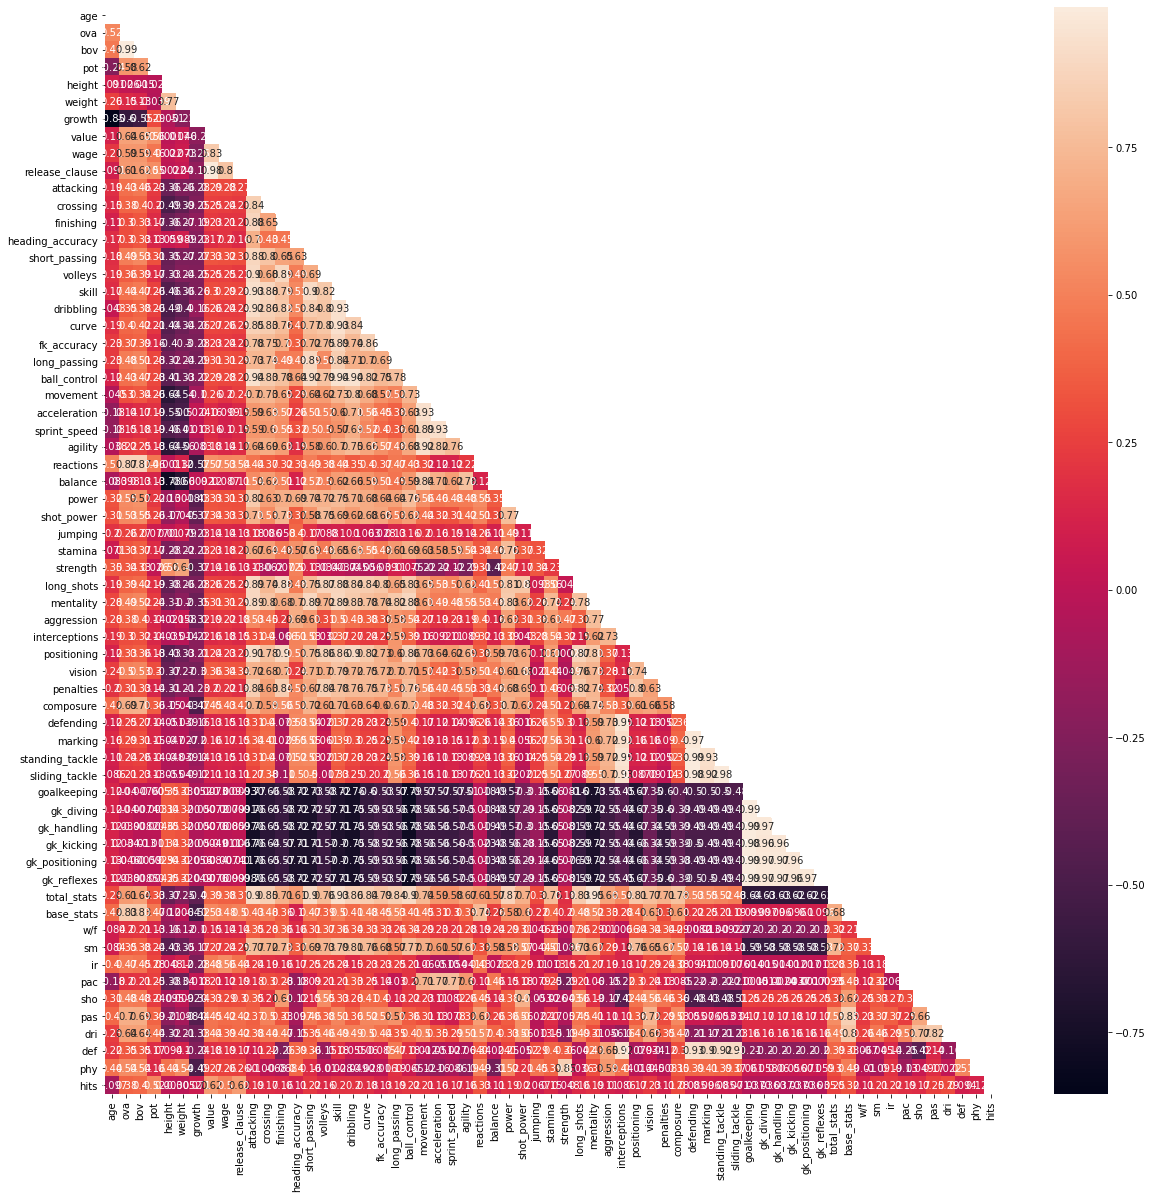

In [47]:
# checking for correlations
correlations_matrix = num.corr()
mask = np.zeros_like(correlations_matrix)

mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [48]:
# droping correlationd column --> all the gk columns
num = num.drop(['gk_diving', 'gk_handling','gk_kicking','gk_positioning','gk_reflexes'], axis=1)

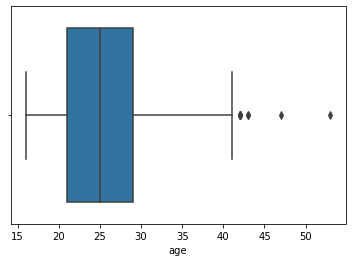

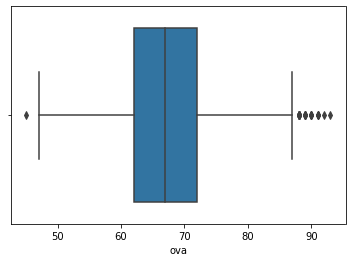

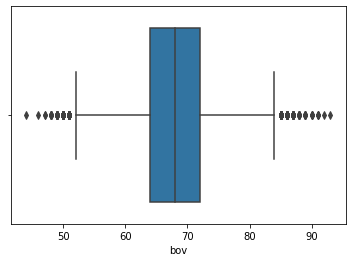

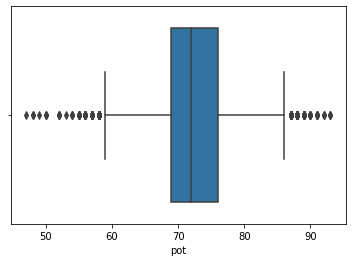

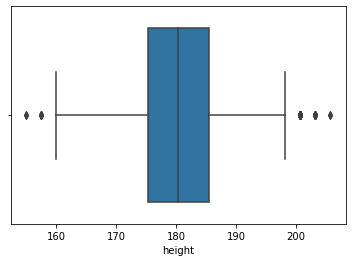

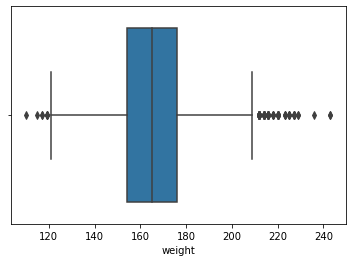

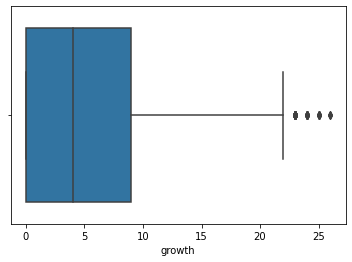

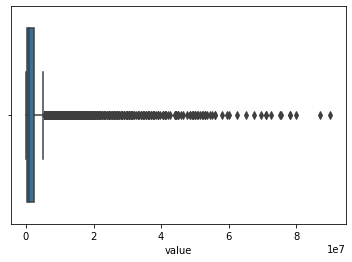

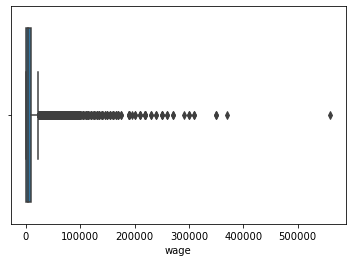

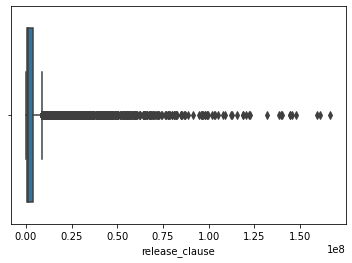

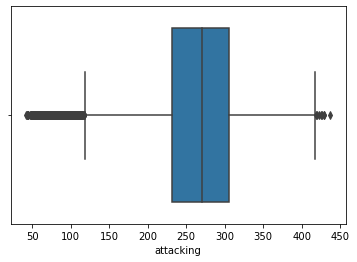

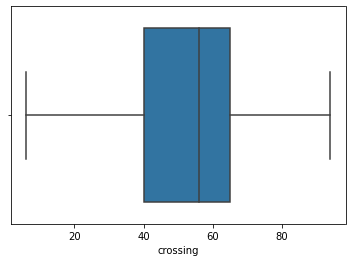

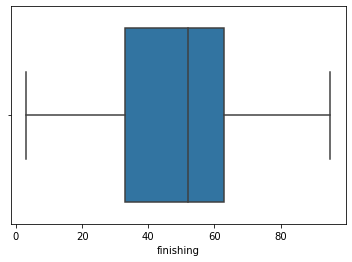

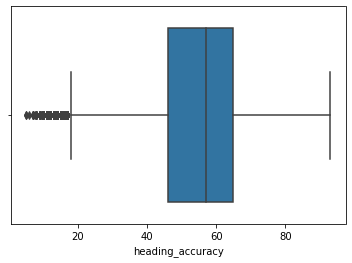

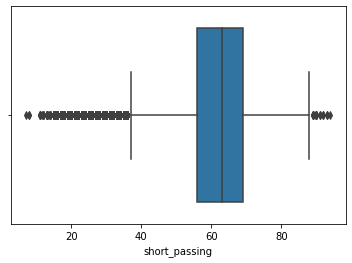

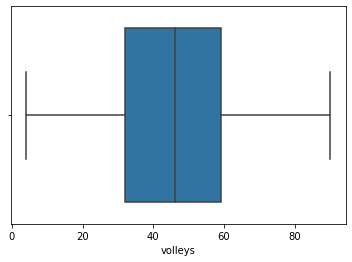

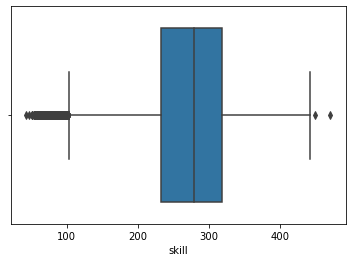

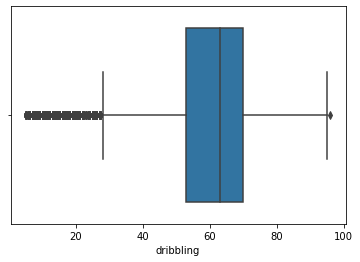

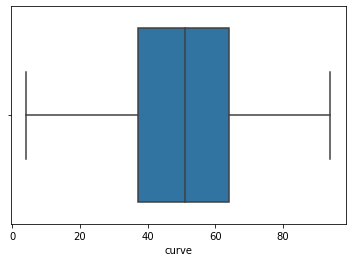

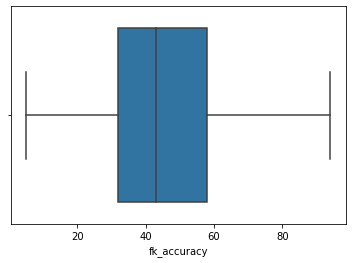

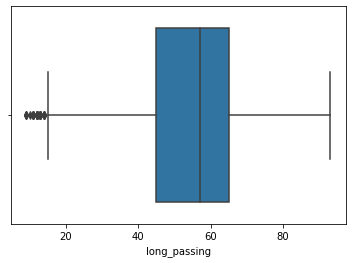

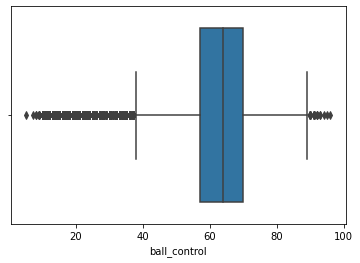

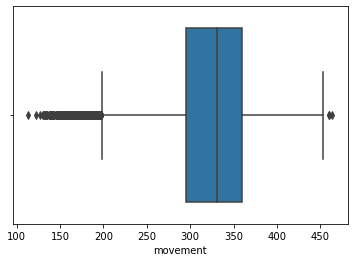

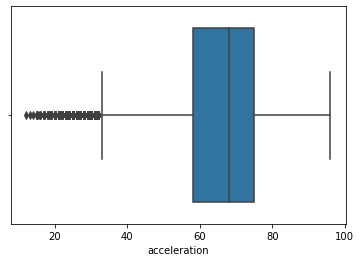

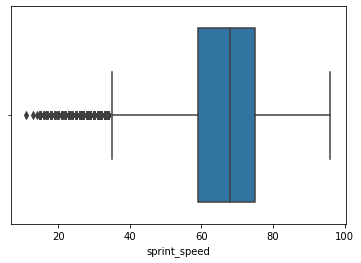

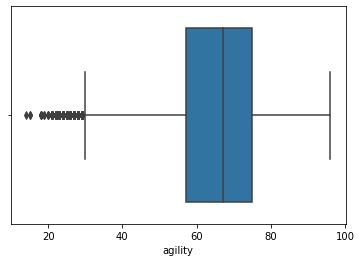

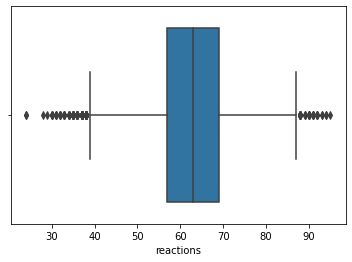

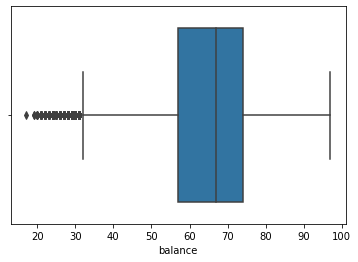

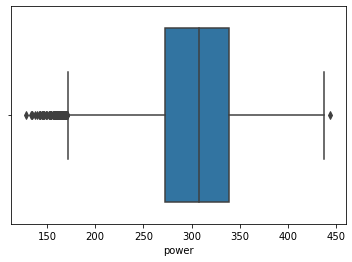

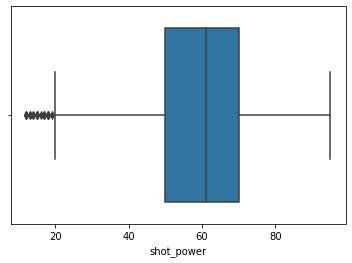

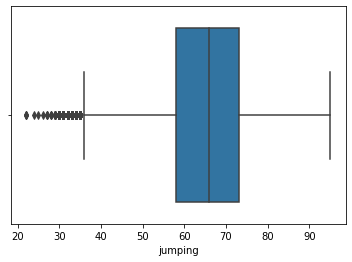

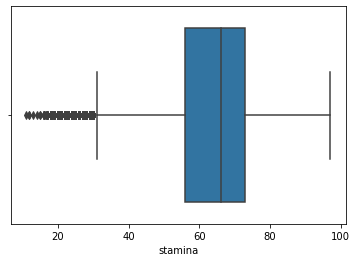

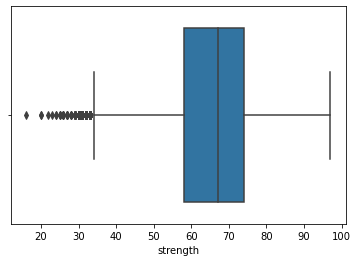

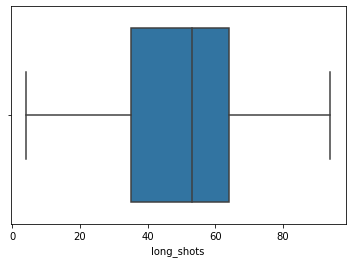

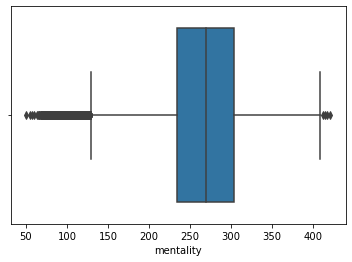

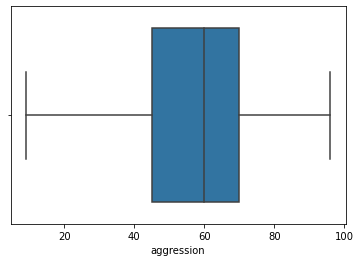

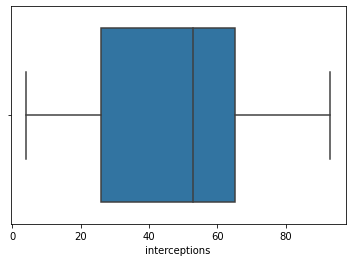

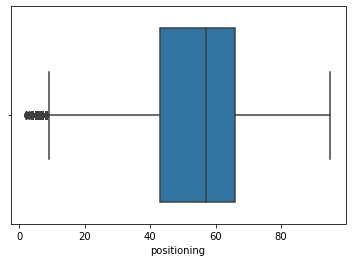

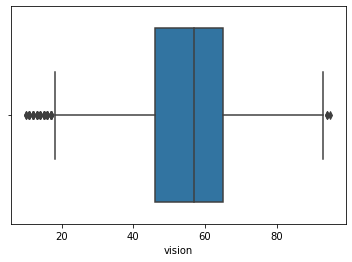

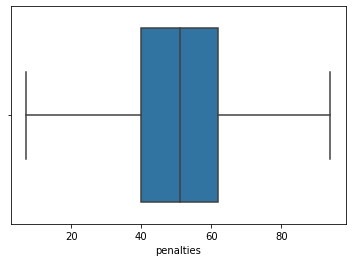

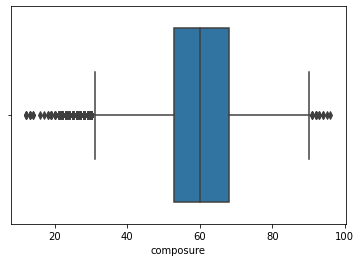

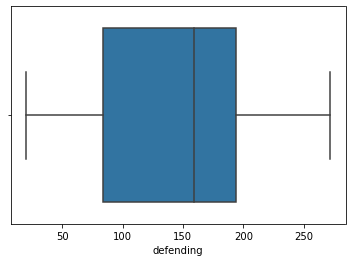

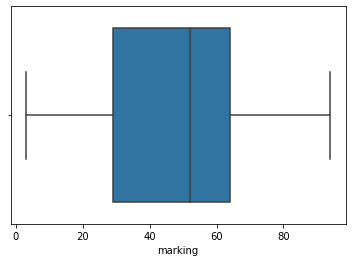

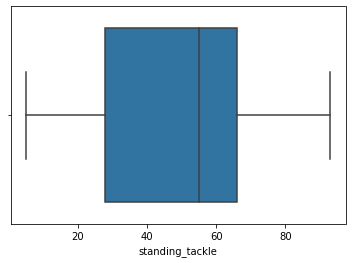

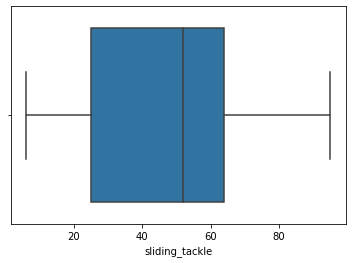

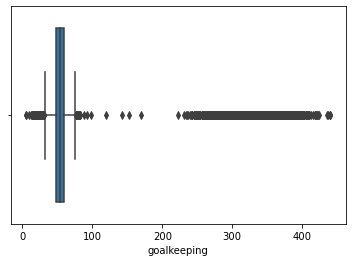

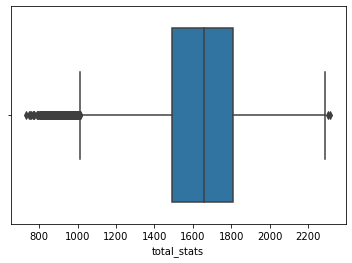

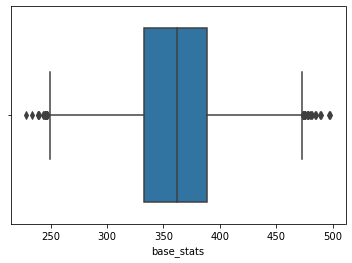

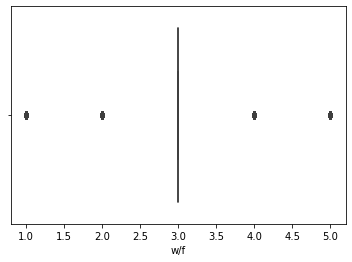

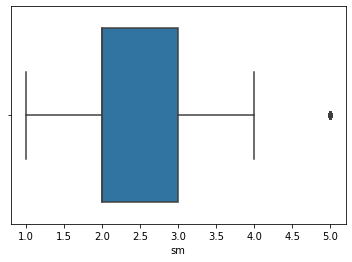

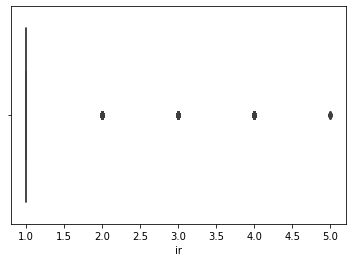

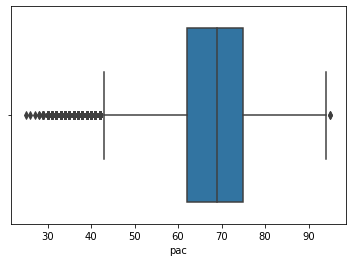

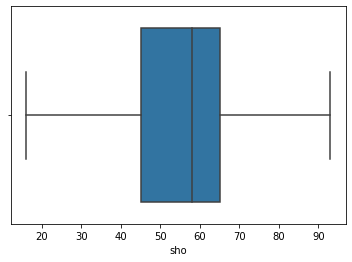

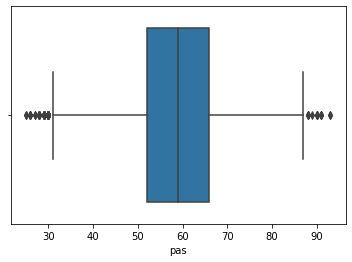

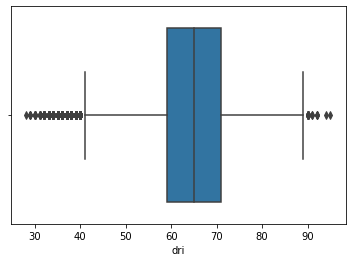

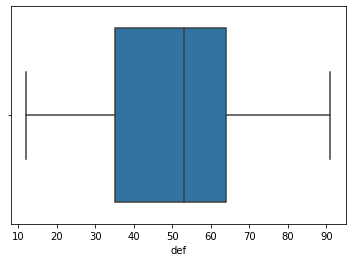

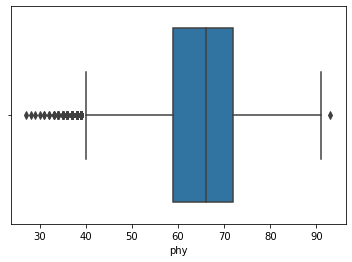

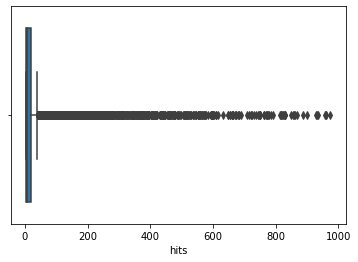

In [49]:
for column in num:
    sns.boxplot(x=num[column]) 
    plt.show()

In [50]:
# define function for boxcox transformation
def boxcox_transform(data):
    numeric_cols = data.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        data[column] = np.where(data[column]<=0, np.NAN, data[column]) 
        data[column] = data[column].fillna(data[column].mean())
        transformed_data, ci = stats.boxcox(data[column])
        data[column] = transformed_data
        _ci[column] = [ci] 
    return data, _ci

In [51]:
# run boxcox function
num_box, _ci = boxcox_transform(num)

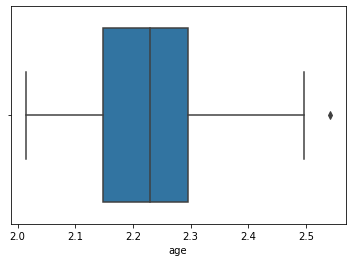

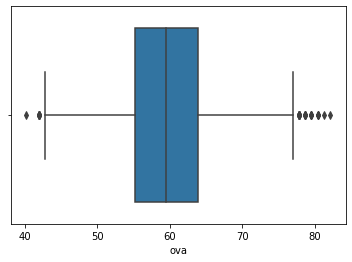

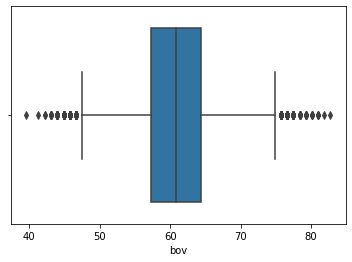

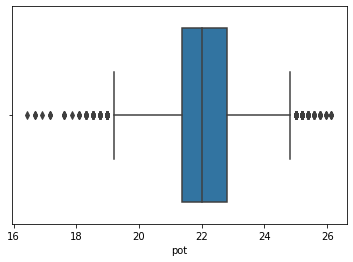

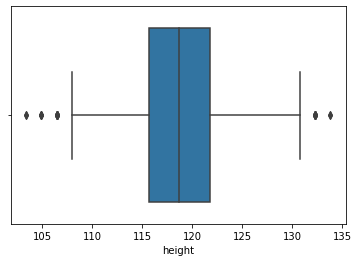

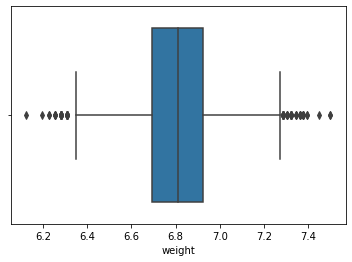

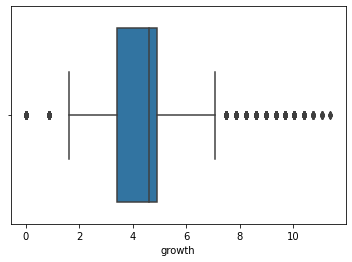

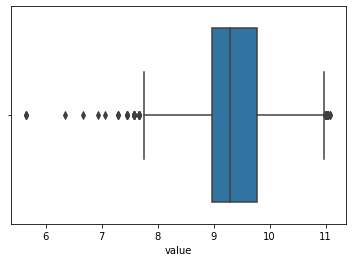

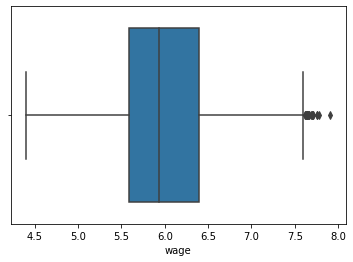

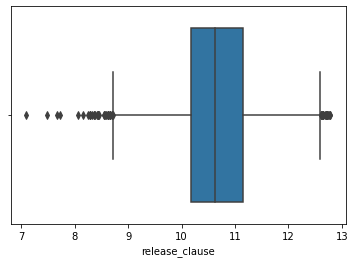

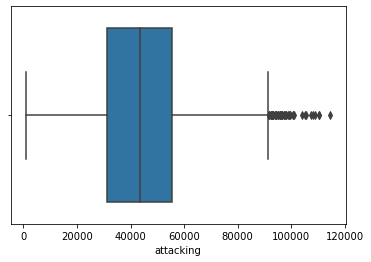

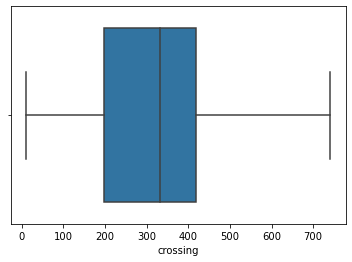

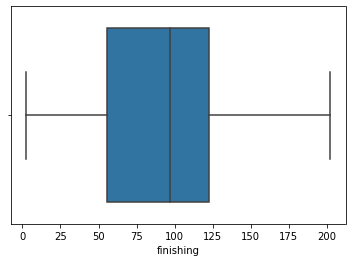

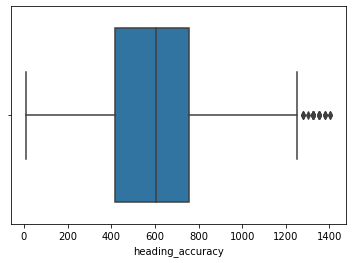

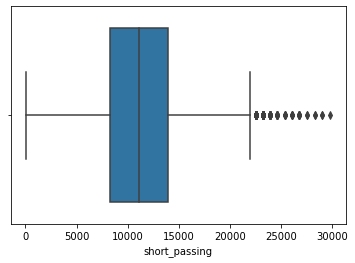

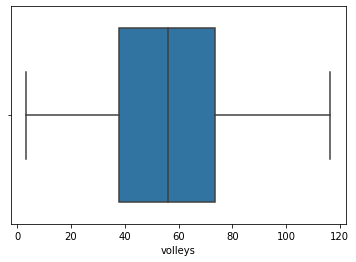

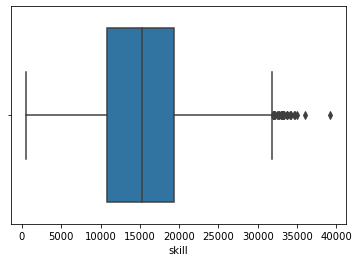

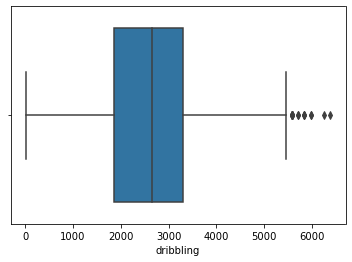

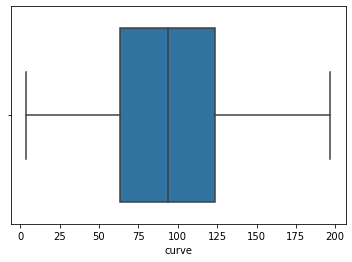

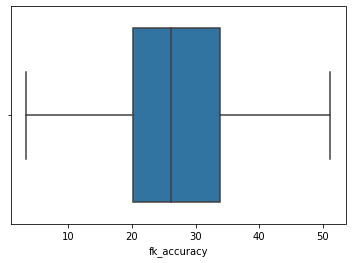

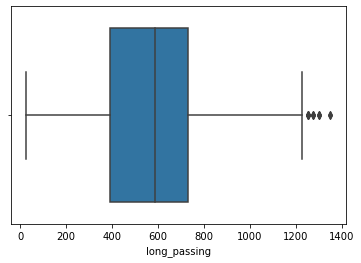

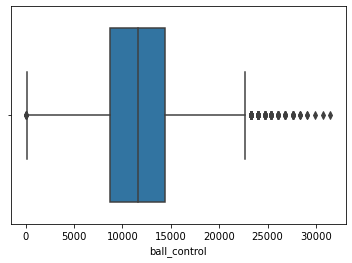

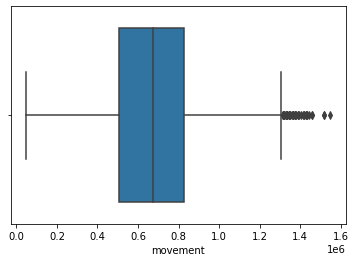

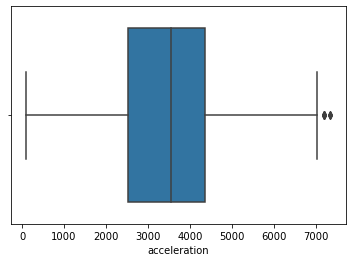

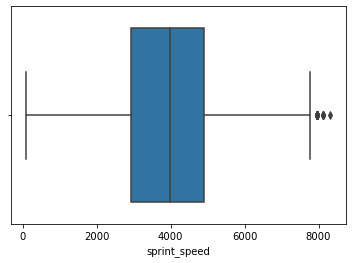

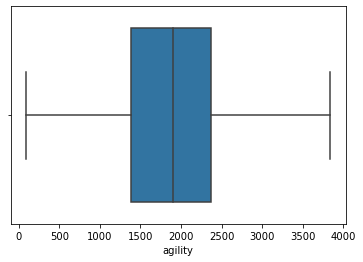

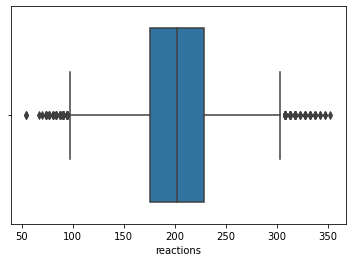

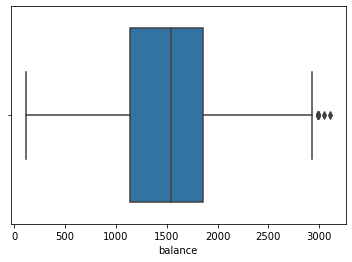

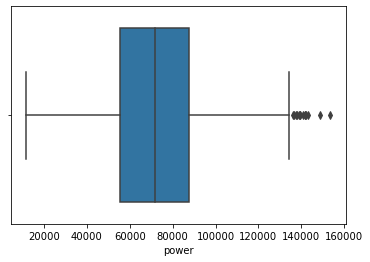

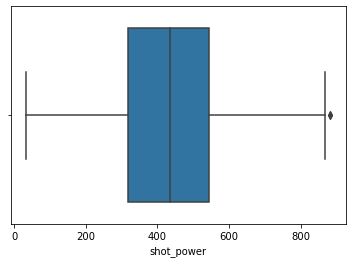

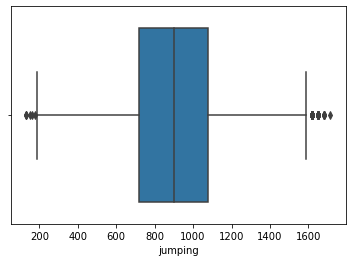

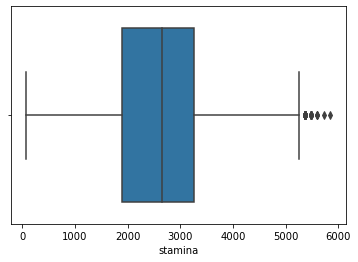

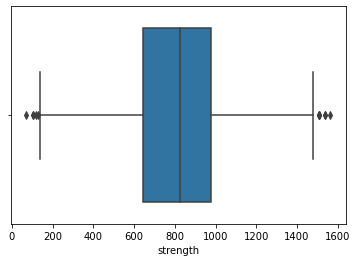

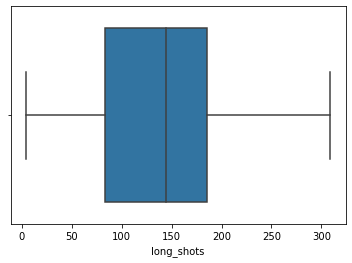

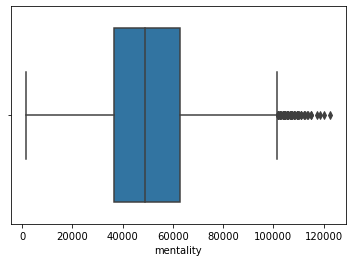

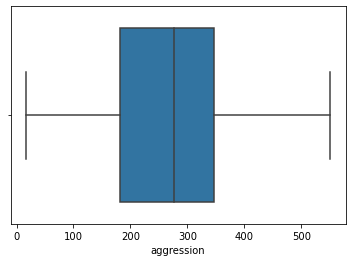

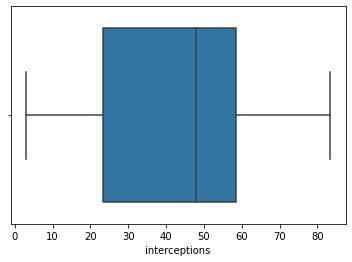

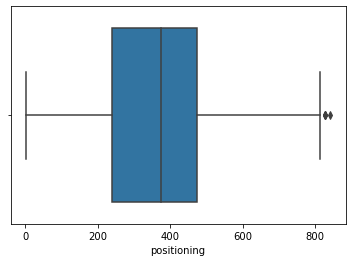

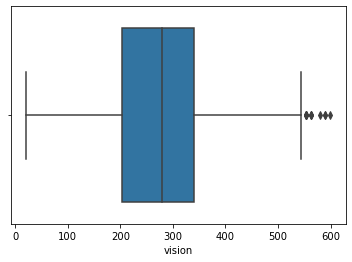

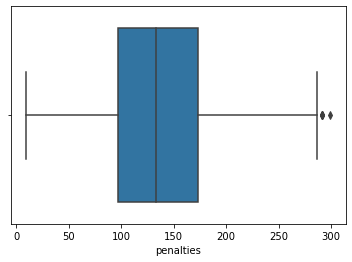

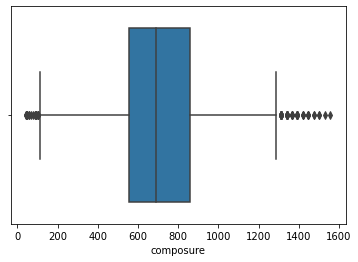

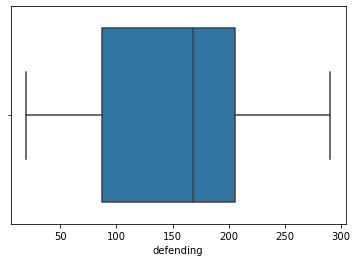

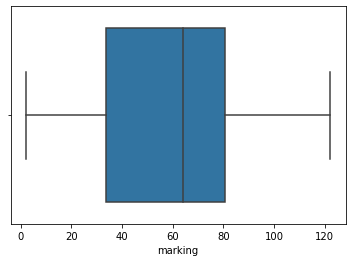

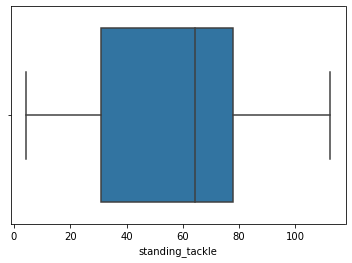

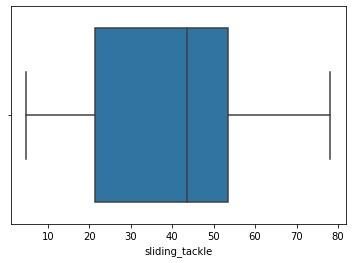

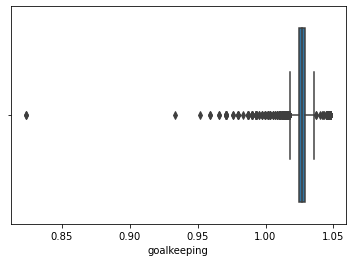

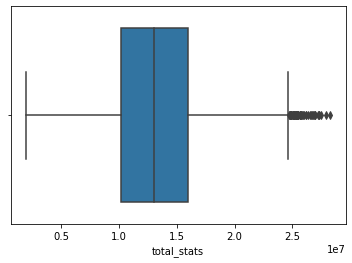

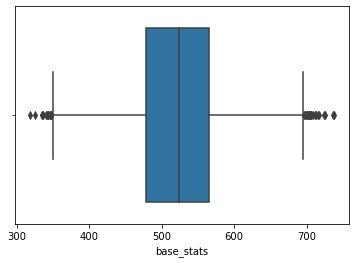

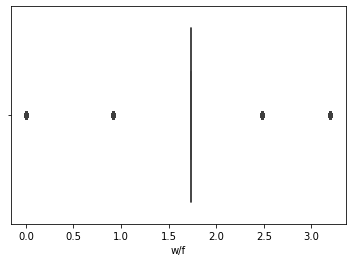

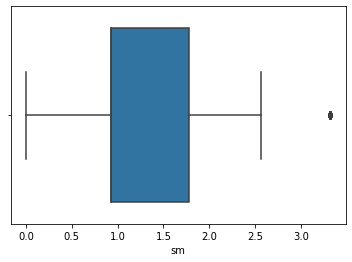

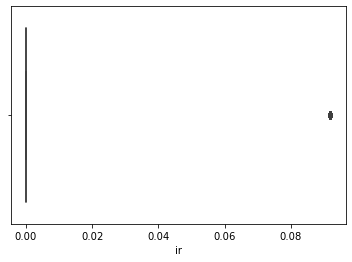

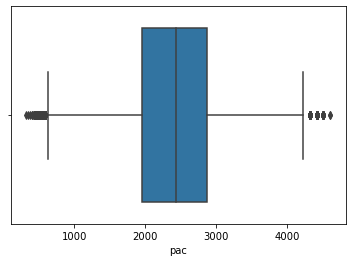

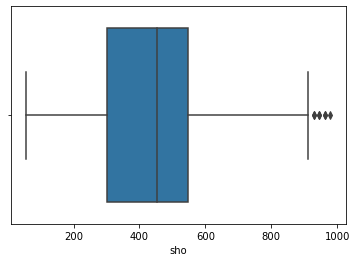

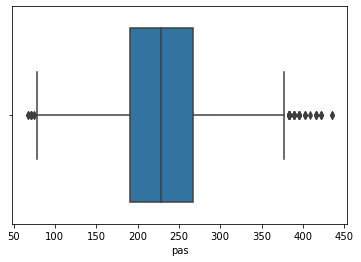

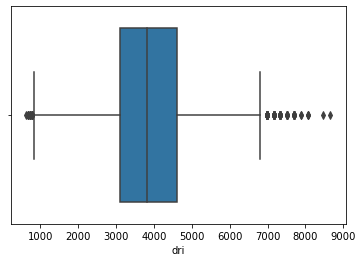

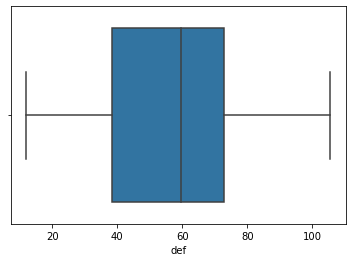

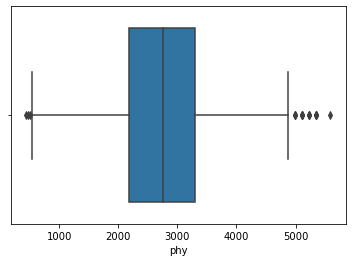

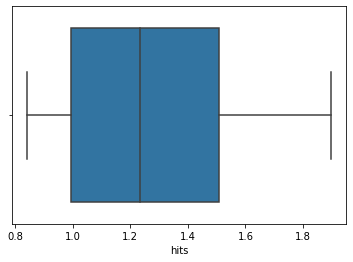

In [52]:
for column in num_box:
    sns.boxplot(x=num_box[column]) 
    plt.show()

In [53]:
X_num_box = num_box.drop('value', axis=1)
y_box = num_box['value']

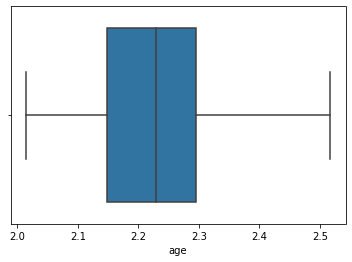

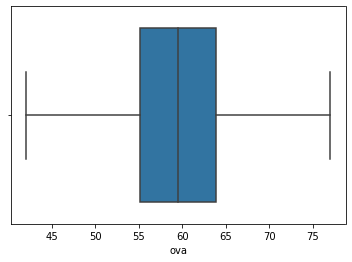

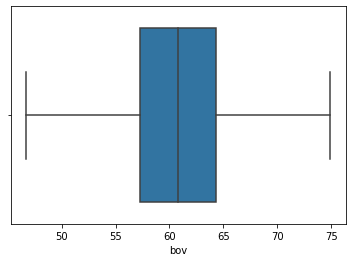

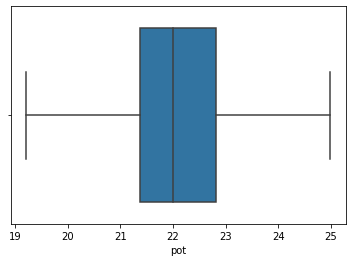

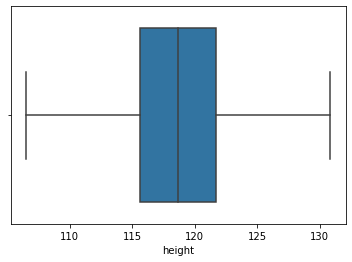

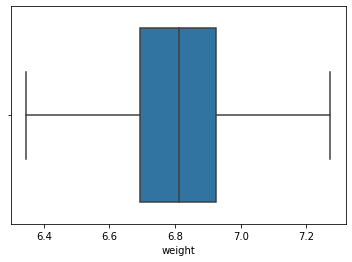

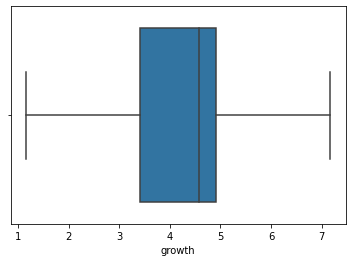

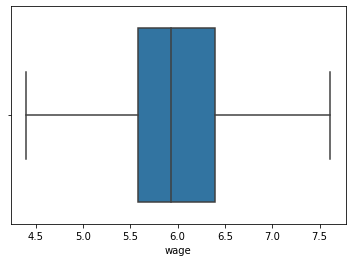

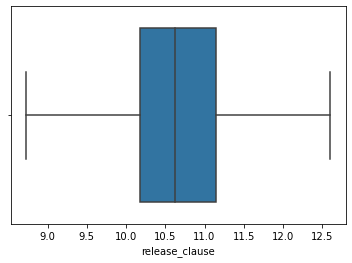

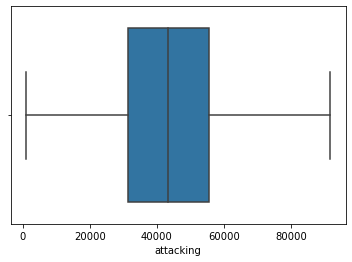

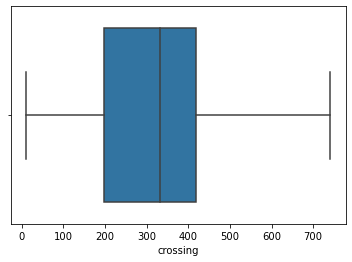

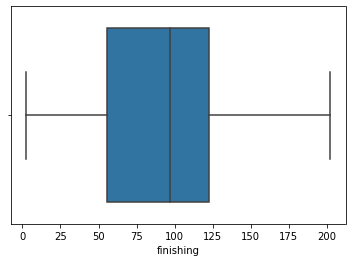

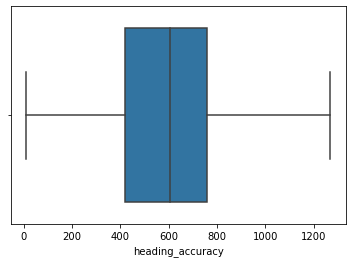

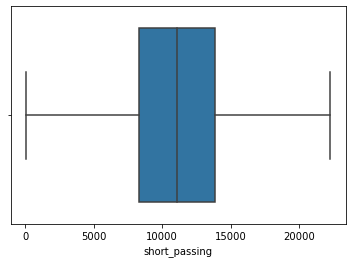

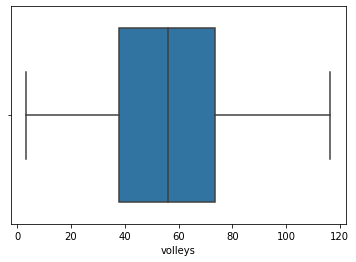

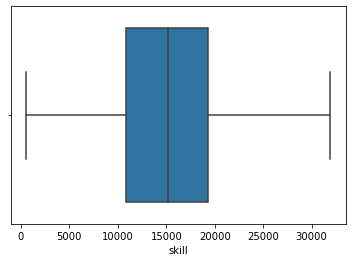

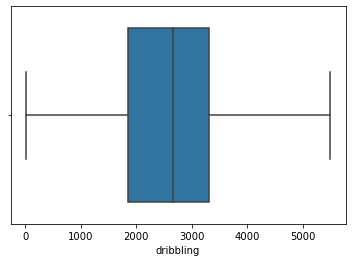

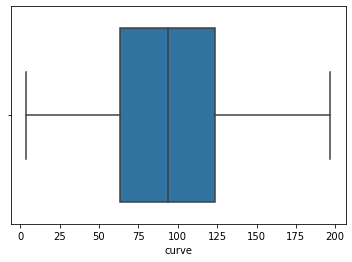

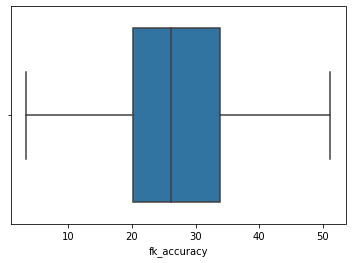

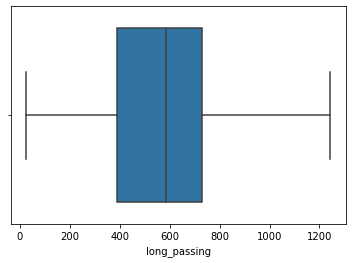

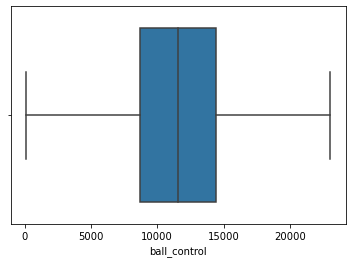

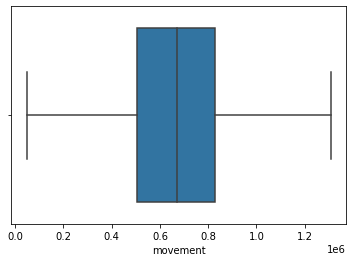

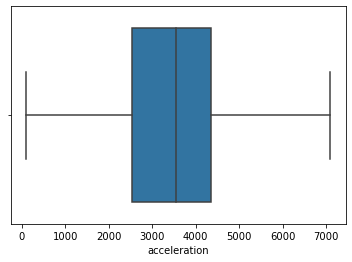

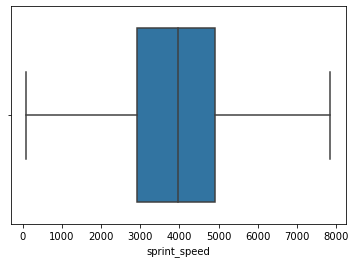

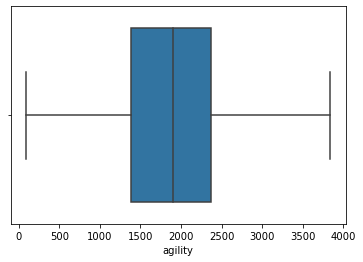

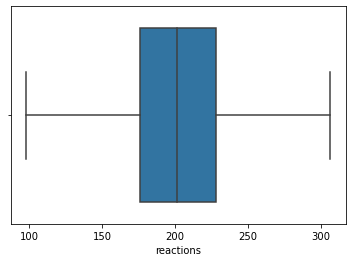

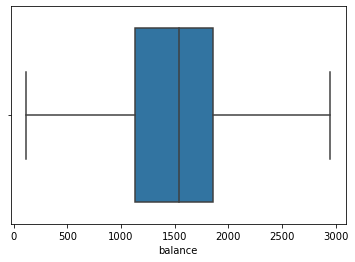

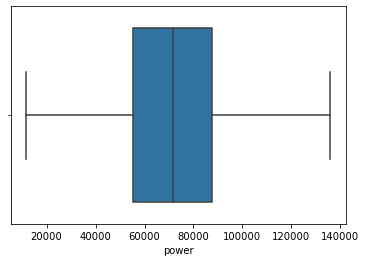

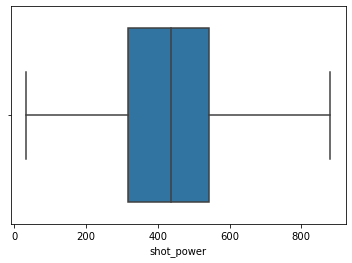

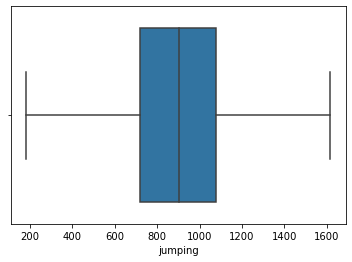

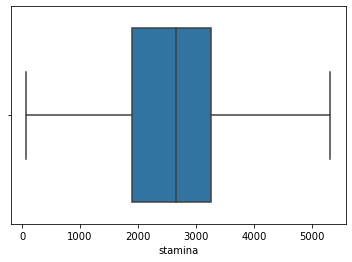

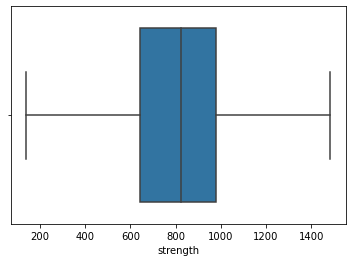

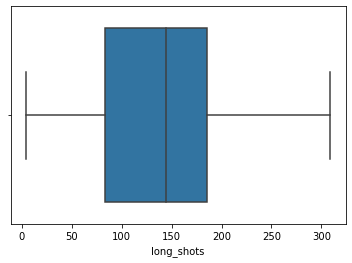

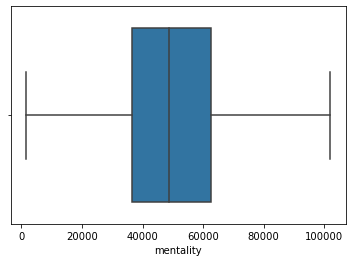

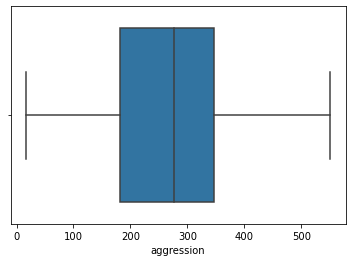

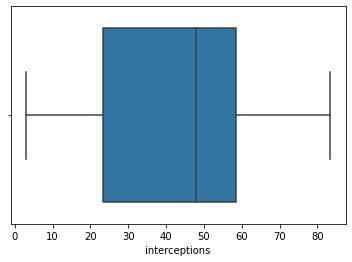

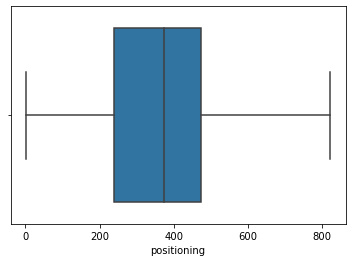

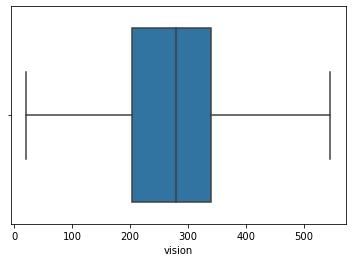

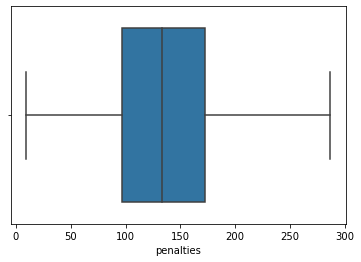

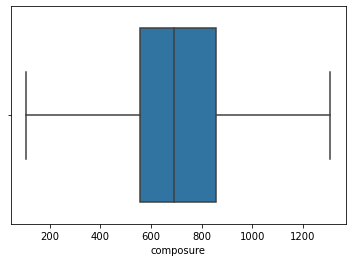

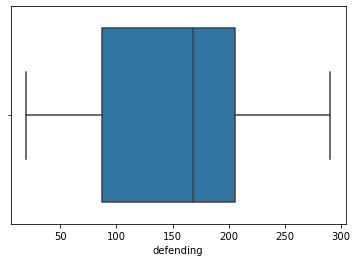

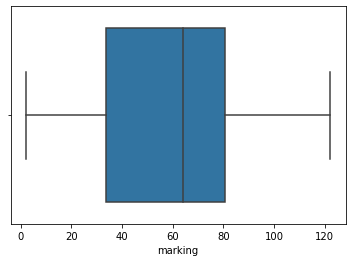

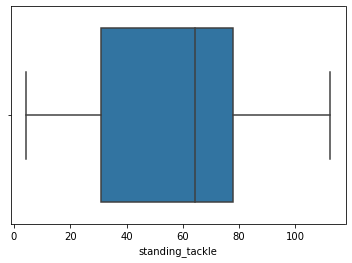

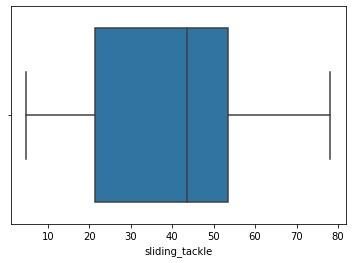

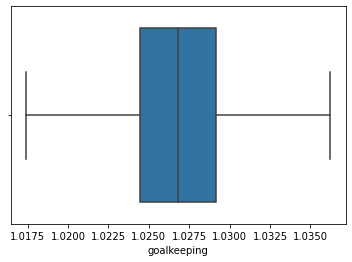

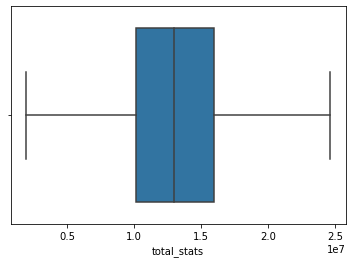

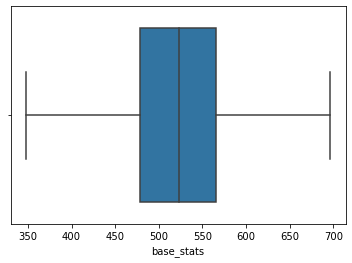

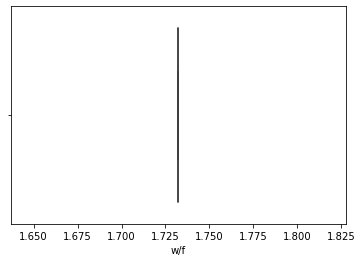

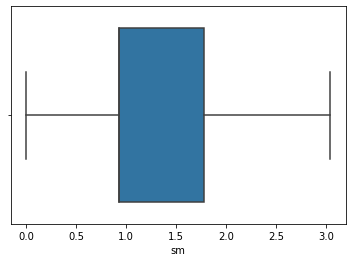

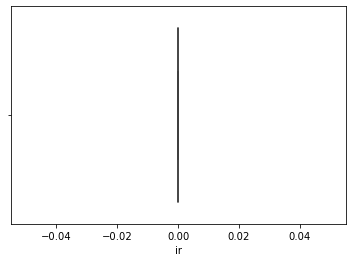

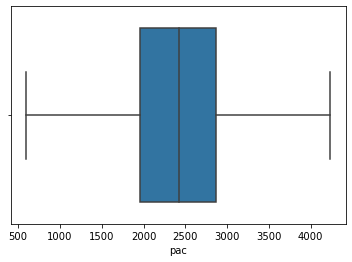

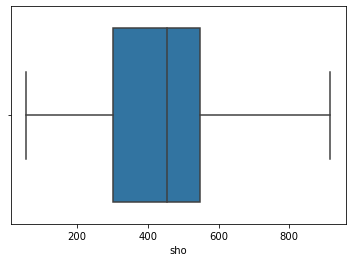

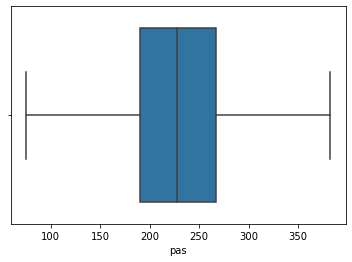

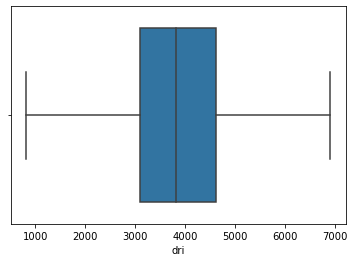

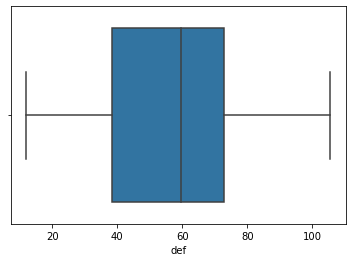

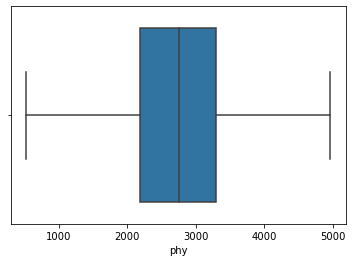

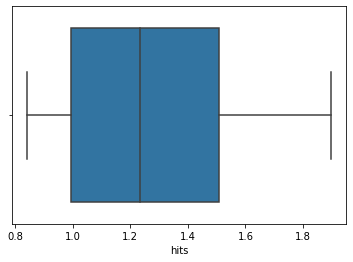

In [54]:
for column in X_num_box:
    iqr = np.percentile(X_num_box[column],75) - np.percentile(X_num_box[column],25)
    upper_limit = np.percentile(X_num_box[column],75) + 1.5*iqr
    lower_limit = np.percentile(X_num_box[column],25) - 1.5*iqr
    X_num_box.loc[X_num_box[column]>upper_limit, column]=upper_limit
    X_num_box.loc[X_num_box[column]<lower_limit, column]=lower_limit
    sns.boxplot(x=X_num_box[column]) 
    plt.show()

In [55]:
# with 'add_constant' we force the model to have an intercept
X_num_box = sm.add_constant(X_num_box)

model = sm.OLS(y_box,X_num_box).fit() # to train the model

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     5158.
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:10:52   Log-Likelihood:                 9622.2
No. Observations:               17003   AIC:                        -1.913e+04
Df Residuals:                   16947   BIC:                        -1.870e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                 -1.4137      0.034  

In [56]:
X_num_box = X_num_box.drop(['weight', 'long_shots','aggression','acceleration', 'vision'], axis=1)

In [57]:
X_num_box = sm.add_constant(X_num_box)

model = sm.OLS(y_box,X_num_box).fit() # to train the model

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     5675.
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:10:52   Log-Likelihood:                 9622.0
No. Observations:               17003   AIC:                        -1.914e+04
Df Residuals:                   16952   BIC:                        -1.875e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                 -1.4123      0.034  

In [58]:
#prepare for normalization
X_num_norm= num.drop('value', axis=1)
y_norm = num['value']

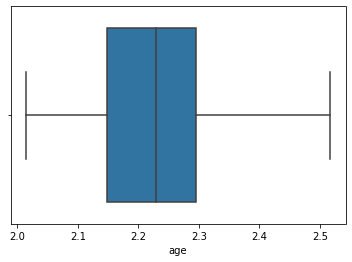

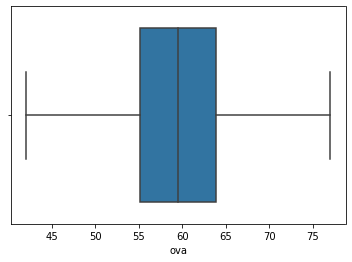

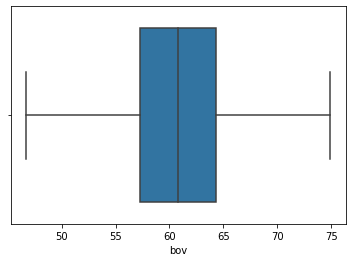

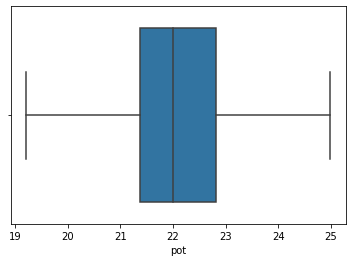

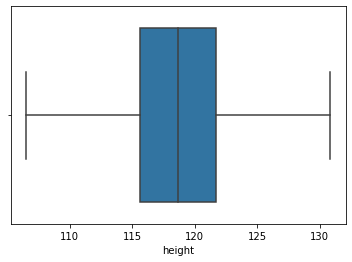

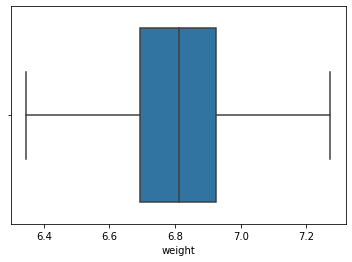

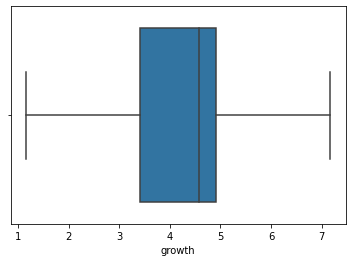

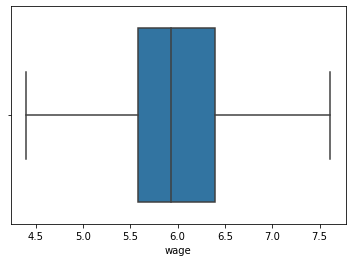

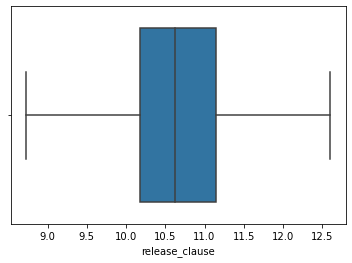

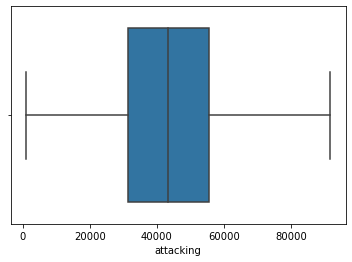

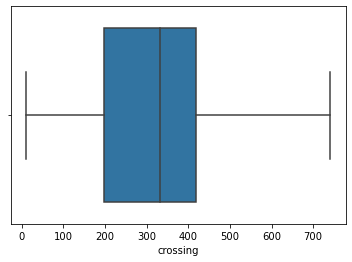

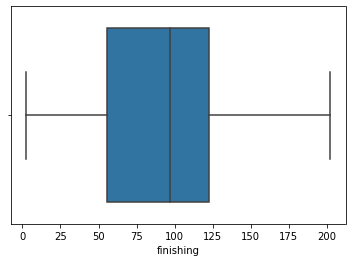

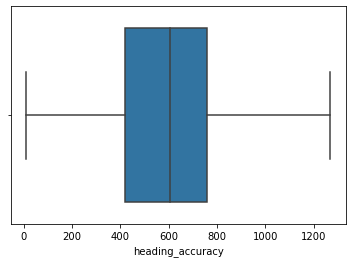

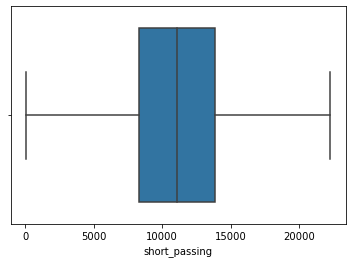

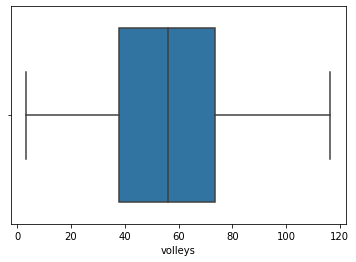

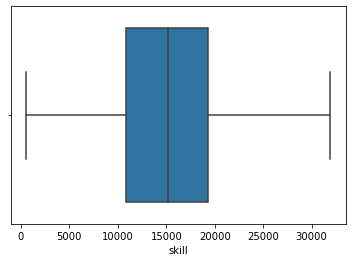

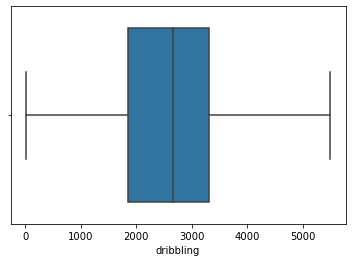

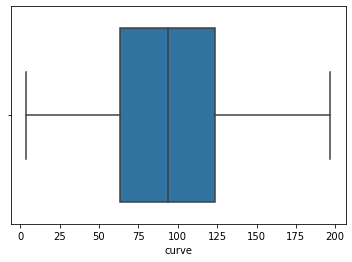

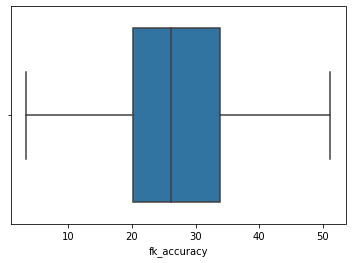

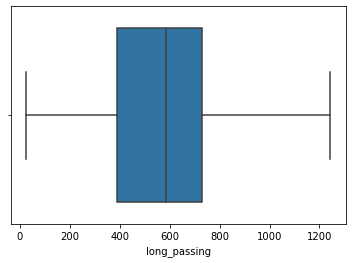

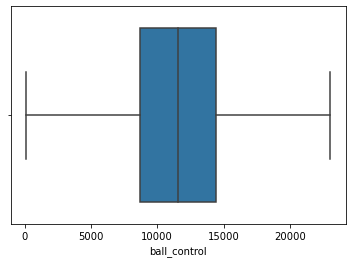

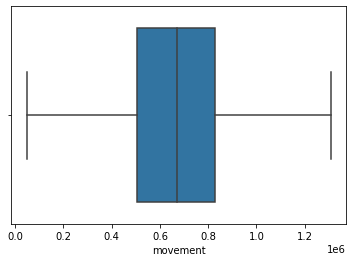

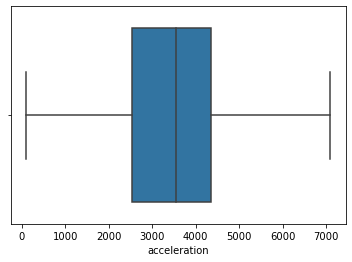

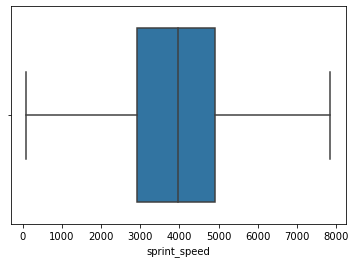

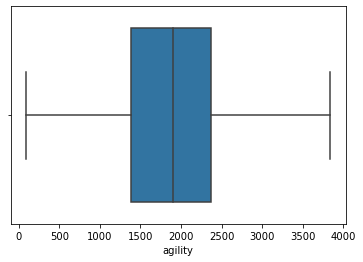

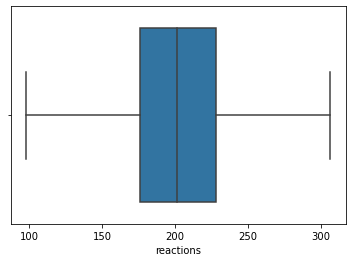

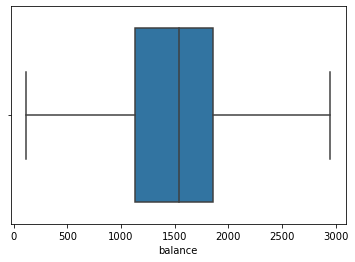

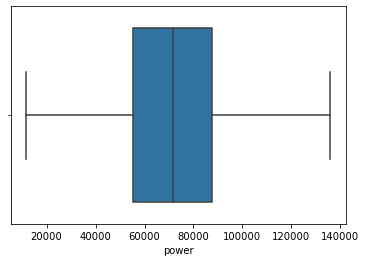

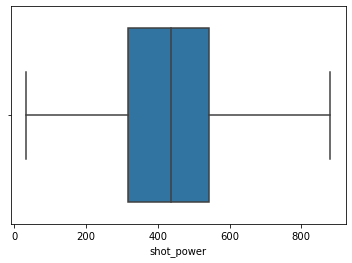

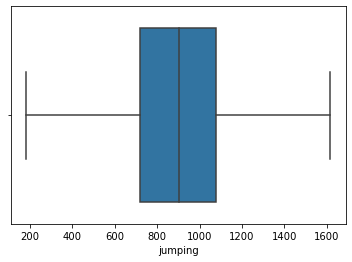

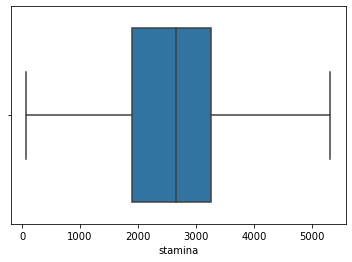

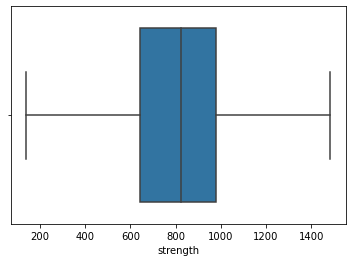

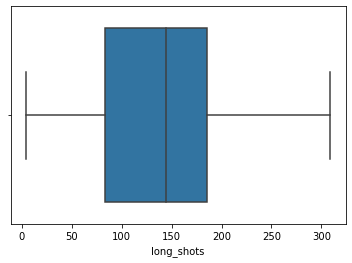

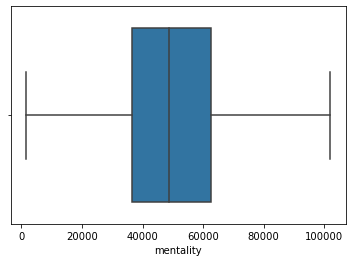

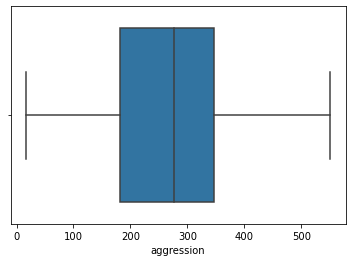

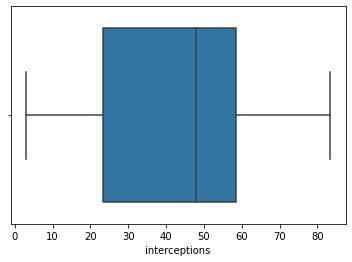

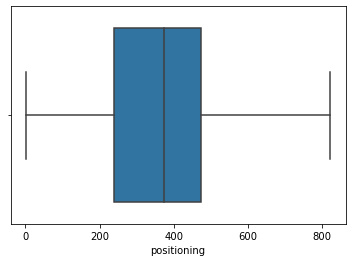

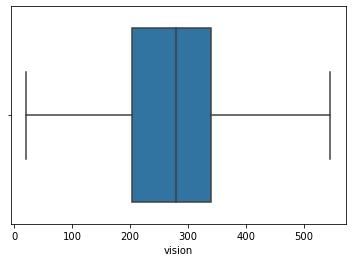

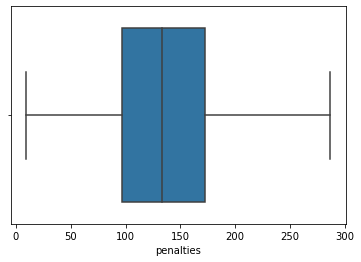

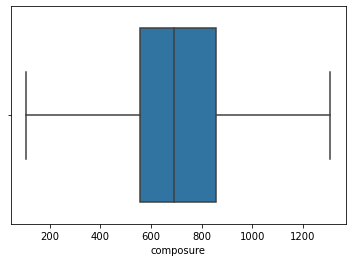

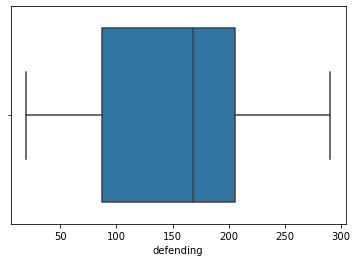

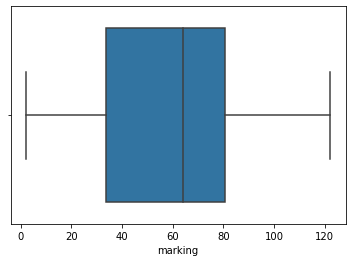

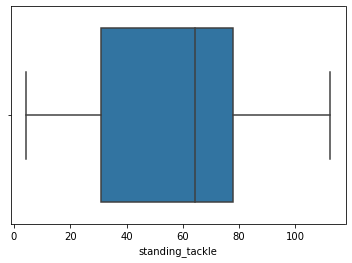

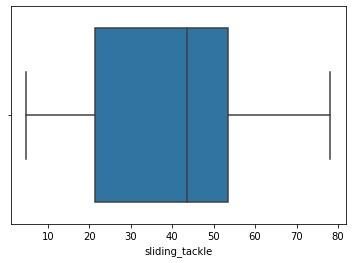

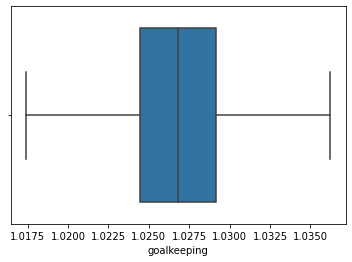

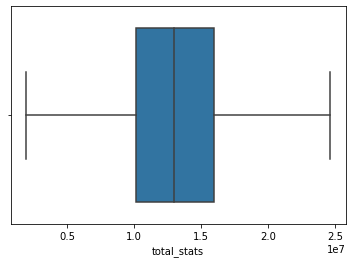

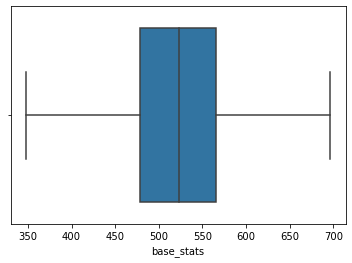

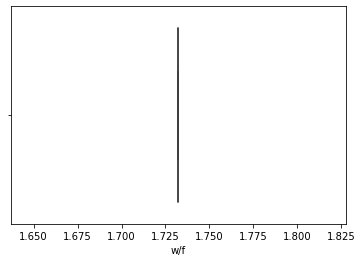

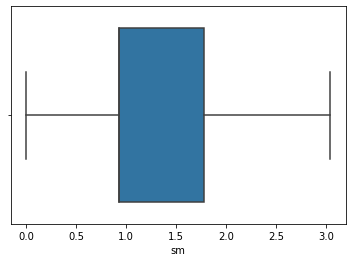

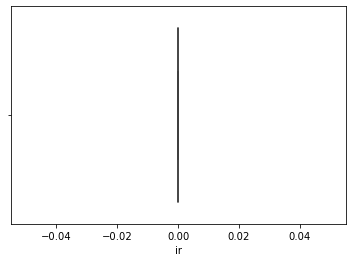

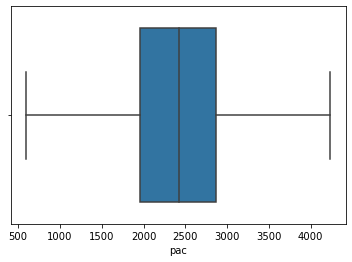

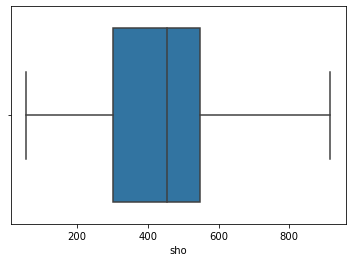

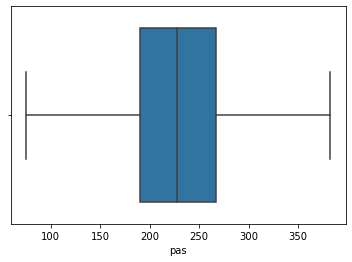

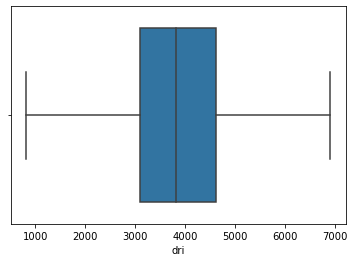

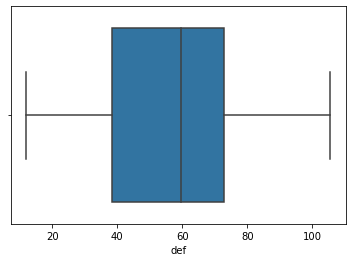

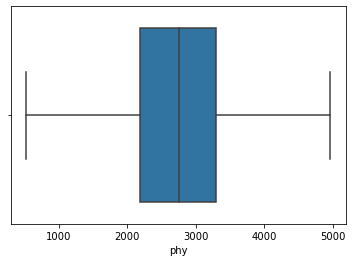

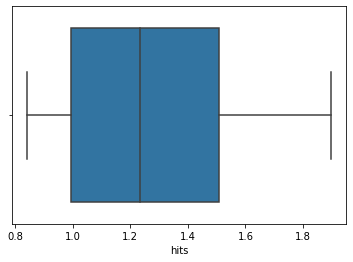

In [59]:
for column in X_num_norm:
    iqr = np.percentile(X_num_norm[column],75) - np.percentile(X_num_norm[column],25)
    upper_limit = np.percentile(X_num_norm[column],75) + 1.5*iqr
    lower_limit = np.percentile(X_num_norm[column],25) - 1.5*iqr
    X_num_norm.loc[X_num_norm[column]>upper_limit, column]=upper_limit
    X_num_norm.loc[X_num_norm[column]<lower_limit, column]=lower_limit
    sns.boxplot(x=X_num_norm[column]) 
    plt.show()

In [60]:
# trying normalization
transformer = Normalizer().fit(X_num_norm)
X_normalized = transformer.transform(X_num_norm)

# 5.2 Categorical Data

In [61]:
X_cat = data1.select_dtypes(include = object)
X_cat

,nationality,club,bp,foot,a/w,d/w,joined_year
0,Italy,Udinese,LWB,Left,Medium,High,2008
1,Spain,KAS Eupen,CM,Right,Medium,Medium,2014
2,England,Coventry City,CAM,Right,Medium,Low,2016
4,Spain,Vissel Kobe,CAM,Right,High,Medium,2018
5,Germany,Alemannia Aachen,RW,Right,Medium,Medium,2011
...,...,...,...,...,...,...,...
17120,France,CD Tondela,CB,Right,Medium,Medium,2020
17121,Wales,Burnley,CAM,Right,Medium,Medium,2020
17122,England,Burnley,RB,Right,Medium,Medium,2020
17123,Bosnia Herzegovina,SK Sturm Graz,RB,Right,High,Medium,2020


In [62]:
cat_data = pd.get_dummies(X_cat, drop_first=True)

In [63]:
#combine numerical/boxcox and categorical data in a new dataframe
full_x_box = pd.concat([X_num_box, cat_data], axis=1)
full_x_box.head()

,age,ova,bov,pot,height,growth,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,mentality,interceptions,positioning,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,total_stats,base_stats,w/f,sm,ir,pac,sho,pas,dri,def,phy,hits,nationality_Albania,nationality_Algeria,nationality_Andorra,nationality_Angola,nationality_Antigua; Barbuda,nationality_Argentina,nationality_Armenia,nationality_Aruba,nationality_Australia,nationality_Austria,nationality_Azerbaijan,nationality_Barbados,nationality_Belarus,nationality_Belgium,nationality_Belize,nationality_Benin,nationality_Bermuda,nationality_Bolivia,nationality_Bosnia Herzegovina,nationality_Brazil,nationality_Brunei Darussalam,nationality_Bulgaria,nationality_Burkina Faso,nationality_Burundi,nationality_Cameroon,nationality_Canada,nationality_Cape Verde,nationality_Central African Republic,nationality_Chad,nationality_Chile,nationality_China PR,nationality_Chinese Taipei,nationality_Colombia,nationality_Comoros,nationality_Congo,nationality_Costa Rica,nationality_Croatia,nationality_Cuba,nationality_Curacao,nationality_Cyprus,nationality_Czech Republic,nationality_DR Congo,nationality_Denmark,nationality_Dominican Republic,nationality_Ecuador,nationality_Egypt,nationality_El Salvador,nationality_England,nationality_Equatorial Guinea,nationality_Eritrea,nationality_Estonia,nationality_Faroe Islands,nationality_Finland,nationality_France,nationality_Gabon,nationality_Gambia,nationality_Georgia,nationality_Germany,nationality_Ghana,nationality_Gibraltar,nationality_Greece,nationality_Grenada,nationality_Guam,nationality_Guinea,nationality_Guinea Bissau,nationality_Guyana,nationality_Haiti,nationality_Honduras,nationality_Hong Kong,nationality_Hungary,nationality_Iceland,nationality_India,nationality_Indonesia,nationality_Iran,nationality_Iraq,nationality_Israel,nationality_Italy,nationality_Ivory Coast,nationality_Jamaica,nationality_Japan,nationality_Jordan,nationality_Kazakhstan,nationality_Kenya,nationality_Korea DPR,nationality_Korea Republic,nationality_Kosovo,nationality_Latvia,nationality_Lebanon,nationality_Liberia,nationality_Libya,nationality_Liechtenstein,nationality_Lithuania,nationality_Luxembourg,nationality_Macau,nationality_Madagascar,nationality_Malawi,nationality_Malaysia,nationality_Mali,nationality_Malta,nationality_Mauritania,nationality_Mexico,nationality_Moldova,nationality_Montenegro,nationality_Montserrat,nationality_Morocco,nationality_Mozambique,nationality_Namibia,nationality_Netherlands,nationality_New Caledonia,nationality_New Zealand,nationality_Nicaragua,nationality_Niger,nationality_Nigeria,nationality_North Macedonia,nationality_Northern Ireland,nationality_Norway,nationality_Palestine,nationality_Panama,nationality_Papua New Guinea,nationality_Paraguay,nationality_Peru,nationality_Philippines,nationality_Poland,nationality_Portugal,nationality_Puerto Rico,nationality_Qatar,nationality_Republic of Ireland,nationality_Romania,nationality_Russia,nationality_Rwanda,nationality_Saint Kitts and Nevis,nationality_Saint Lucia,nationality_Saudi Arabia,nationality_Scotland,nationality_Senegal,nationality_Serbia,nationality_Sierra Leone,nationality_Singapore,nationality_Slovakia,nationality_Slovenia,nationality_South Africa,nationality_South Sudan,nationality_Spain,nationality_Sudan,nationality_Suriname,nationality_Sweden,nationality_Switzerland,nationality_Syria,nationality_São Tomé; Príncipe,nationality_Tanzania,nationality_Thailand,nationality_Togo,nationality_Trinidad; Tobago,nationality_Tunisia,nationality_Turkey,nationality_Uganda,nationality_Ukraine,nationality_United Arab Emirates,nationality_United States,nationality_Uruguay,nationality_Uzbekistan,nationality_Venezuela,nationality_Vietnam,nationality_Wales,nationality_Zambia,nationality_Z

In [64]:
#combine numerical/normalized and categorical data in a new dataframe
full_x_norm = np.concatenate([X_normalized, cat_data], axis=1)

# 6. Linear Regression

In [65]:
# for boxcox, outliers & dummies
X = full_x_box
y=y_box

#for normalized, outliers & dummies
#X = full_x_norm
#y=y_norm

In [66]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [68]:
predictions  = model.predict(X_test)

In [64]:
#boxcox(iqr=1.5), outliers, dummies
#r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_squared_error(y_test, predictions)

(0.3594331021091651, 0.45958166743528034, 0.2112153090425926)

In [66]:
#boxcox (iqr=1.25), outliers, droping more coluns because of p-values, dummies
#r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_squared_error(y_test, predictions)

(0.9551855903469086, 0.12155960782349555, 0.014776738254202039)

In [131]:
#notmalized, outliers, dummies
r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_squared_error(y_test, predictions)

(0.12932894671187123, 0.5358059146413614, 0.28708797816466586)

In [69]:
#boxcox (iqr=1.25), outliers, droping more coluns because of p-values, dummies
r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_squared_error(y_test, predictions)

(0.9551855903469086, 0.12155960782349555, 0.014776738254202039)